# <center> **A Basic Guide on Cleaning MLB Statcast Data using pandas DataFrames and matplotlib** </center>
## <center> By Christopher Hauman </center>
<br>
<br>
<br>
<br>

### This notebook contains a guide for basic data cleaning and analysis on MLB Statcast data. We'll cover some of the fundamentals of cleaning and visualizing data using pandas DataFrames and matplotlib. Please be aware this is still in development. I haven't proofread it or finished certain sections.

<br>
<br>

## **Table of Contents**

1. [**Introduction**](#intro-bullet)
2. [**Importing and Quick Diagnosis**](#1.0)
3. [**Missing Data**](#2.0)
    * [Visualization for Missing Data](#2.1)
    * [Deletion](#2.2)
    * [Imputaion using Average](#2.3)
    * [mputaion using K-NN](#2.4)
4. [**Outliers**](#3.0)
    * [Visualization for Outliers](#3.1)
    * [Understanding outliers](#3.2)
    * [Visualization for Multivariate Outliers](#3.3)
    * [Removing Outliers using IQR](#3.4)
    * [Removing Outliers using Z-score](#3.5)
    * [Outlier Post Analysis](#3.6)
5. [**Why the pandas DataFrame?**](#4.0)
6. [**Tidying Data**](#5.0)
    

<br>
<br>

Preface: This guide is primarily directed at newcomers to Data Science and Python, but is also meant be useful to those who simply wish to know more about cleaning and tidying data. I have a few goals in this guide, the foremost of which is to give you a framework for how to strategically approach cleaning data and think critically each step of the way. I'll do this by walking you throgh a hands-on example of cleaning a raw dataset and introducing you to few particularly useful python libraries to help you visualize and analyze your own data. Finally, I'll connect you with as many resources as possible by linking them throughout the guide. You can use these for clarification or if you want to go more in-depth on a topic. 

<br>
<br>

***

## <center> **Introduction** <a class="anchor" id="intro-bullet"></a> </center>

When we think of cleaning data, it needs to be contextualized within the framework of the field of data science. This handy image from [Doing Data Science](http://shop.oreilly.com/product/0636920028529.do) sums the entire process up quite nicely:

<br>

###  <center> The Data Science Process</center> 
<img src="The-Data-Science-Process.png" alt="Drawing" style="width: 800px;"/>
<br>
<br>

Cleaning data is only a single step in a long (and usually nonlinear) path to performing data science. To succeed as a data scientist, you'll often perform multiple iterations of analysis, cleaning, analysis, and so on before you can be confident that your data is ready for modeling. For the sake of this guide, we'll only be focused on the cleaning step with some  visualization to assist in the process. Additionally, the process of cleaning is really split into two steps, cleaning and tidying. I'll go into brief detail about tidying later, so you don't need to worry about the distinction right now. Just know that we are primarily focused on *cleaning*.

This guide is not meant to provide a hard and fast structure for how to clean data. In reality, every project is unique, and the steps required to successfully clean your data need to be tailored specifically to the needs of that project. Instead, this is meant to be a quick case study in which we display some of most the useful and convenient tools for cleaning data and exploratory analysis using the pandas and seabron libraries in python.

The data was retrieved from [Baseball Savant](https://baseballsavant.mlb.com/), a website created and maintained by Daren Willman, the Director of Research and Development for Major League Baseball. MLB Savant is a subset of the immense wealth of MLB Statcast data which Daren had graciously made available to the public for free! [Statcast](https://blogs.umass.edu/Techbytes/2017/12/15/what-is-statcast/) technology uses a combination of cameras and doppler radar to obtain precise real-time measurements, from the spin rate of pitches to the launch angle (angle off the bat) of hits!

The specific dataset I'm using consists of all the players who hit home runs during the 2018 MLB season, and the average measurements for those players for each of those home runs. [Here's](https://baseballsavant.mlb.com/statcast_search?hfPT=&hfAB=home%5C.%5C.run%7C&hfBBT=&hfPR=&hfZ=&stadium=&hfBBL=&hfNewZones=&hfGT=R%7C&hfC=&hfSea=2018%7C&hfSit=&player_type=batter&hfOuts=&opponent=&pitcher_throws=&batter_stands=&hfSA=&game_date_gt=&game_date_lt=&hfInfield=&team=&position=&hfOutfield=&hfRO=&home_road=&hfFlag=&hfPull=&metric_1=&hfInn=&min_pitches=0&min_results=0&group_by=name&sort_col=pitches&player_event_sort=h_launch_speed&sort_order=desc&min_pas=0#results) a link to the query I did if you want to see it from the source or try your own. One can also use the [pybaseball](https://github.com/jldbc/pybaseball) or [baseballr](https://github.com/BillPetti/baseballr) packages to directly import the data to python or R, but that's a lesson for another time.

***

### **Chapter 1 <a class="anchor" id="1.0"></a>**
### **Importing and Quick Diagnosis**
<br>

The very first thing we need to do is take time to consider where the data itself is coming from and our purpose for using it. This will guide every step of the data science process including cleaning and exploratory analysis. Statcast is extremely reliable, as all data (at least data measured after 2015) are either measured directly, calculated using direct measurements, or listed as missing. This means we can discard the risk of reporting or sampling [biases](https://topdrawer.aamt.edu.au/Statistics/Good-teaching/Data-collection/Bias-in-data), but should still be aware of potential systematic measurement errors. Next, we want to keep in mind what we want to use this data for. We're only thinking about home runs today, so we'll want to end up with a DataFrame that only includes things related to home runs!

Now we're ready to import the data, in this case from a [csv file](https://www.lifewire.com/csv-file-2622708) containing the Statcast dataset.  As a data scientist, you'll almost always want to import your data into a [pandas DataFrame](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python). This is one of the most versatile and useful tools in your python data science toolbelt, and it has a ton of useful [methods and attributes](https://www.geeksforgeeks.org/accessing-attributes-methods-python/). We'll acquaint ourselves with a few of them in this tutorial! If you store a pandas DataFrame in the variable df, (we use df_raw, df_2, etc.) you use a method on it with the syntax df.**method()** and an attribute with the syntax df.**attribute**.

Anyways, back to the importing: For a large enough dataset you should consider either starting with random sample or importing in chunks, but for now we're dealing with a small dataset and can simply import the whole thing. We use the pandas **read_csv()** function to do this.

In [85]:
#import pandas and matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt


#import csv file to df_raw DataFrame
df_raw = pd.read_csv("allhr2018.csv")

<br>
<br>

It's always worth the time to quickly check the type of df_raw to make sure it's actually and pandas dataframe:

In [86]:
#check df_raw datatype
type(df_raw)

pandas.core.frame.DataFrame

<br>

Perfect! Now that we've imported our dataframe, we're ready to begin the process of cleaning it. The first stage is quick diagnoisis, and includes fixing unhelpful or incorrect column names and removing unneccary columns. Before we even look at the contents of the dataframe, we use the **columns** attribute to quickly look at the column names of df_raw:

In [87]:
#print column names of df_raw
print(df_raw.columns)

Index(['pitches', 'player_id', 'player_name', 'total_pitches', 'pitch_percent',
       'ba', 'iso', 'babip', 'slg', 'woba', 'xwoba', 'xba', 'hits', 'abs',
       'launch_speed', 'launch_angle', 'spin_rate', 'velocity',
       'effective_speed', 'whiffs', 'swings', 'takes', 'eff_min_vel',
       'release_extension', 'pos3_int_start_distance',
       'pos4_int_start_distance', 'pos5_int_start_distance',
       'pos6_int_start_distance', 'pos7_int_start_distance',
       'pos8_int_start_distance', 'pos9_int_start_distance'],
      dtype='object')


One of the most common issues with imported datasets is with column errors and inconsistency. It's easy to miss, and can cause endless frustration down the line if you do. We can thank our friend Daren at Savant for the fact that each column name has no spaces in it, there are no inconsistent capitalizations, and no repeated column names. Don't worry if some of these variable names are confusing. You can check out the [CSV Documentation](https://baseballsavant.mlb.com/csv-docs) for the Savant data or MLB.com's [glossary](http://m.mlb.com/glossary/statcast), which contains descriptions for most (but not all) of the variables in the dataset. This brings us to some important things to be aware of:
<br>
<br>
1. **It's conventional to never include capitalized characters or spaces in column names. We do this for the sake of consistency and convenience.**
2. **We'll refer to rows in a DataFrame as 'observations' and columns as 'variables' or 'variable names' from here on out. This is not always the convention, but for tidying and modeling data it's a good habit to get into.**
<br>
<br>

Now it's finally time to take a direct look at the DataFrame by calling the **head()**, **tail()**, and **sample()** methods on it. **head()** gives us the first observations (rows) in the DataFrame, **tail()** the last, and  **sample()** outputs a random sample of observations.

In [88]:
#Print first 5 observations
df_raw.head()

,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,...,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance
0,48,501981,Khris Davis,2514,1.9,1,3,NaN,4,2.031,...,0,-0.6,5.93,107.0,152.0,119.0,146.0,306.0,327.0,300.0
1,43,502110,J.D. Martinez,2519,1.7,1,3,NaN,4,2.031,...,0,-0.3,6.05,106.0,151.0,118.0,145.0,294.0,324.0,304.0
2,40,608336,Joey Gallo,2348,1.7,1,3,NaN,4,2.031,...,0,-0.5,5.96,117.0,169.0,135.0,157.0,301.0,329.0,304.0
3,39,608070,Jose Ramirez,3002,1.3,1,3,NaN,4,2.031,...,0,-0.2,6.09,112.0,149.0,118.0,147.0,291.0,317.0,296.0
4,39,545361,Mike Trout,2543,1.5,1,3,NaN,4,2.031,...,0,-0.7,5.90,109.0,152.0,117.0,145.0,308.0,325.0,299.0


In [89]:
#Print last 5 observations
df_raw.tail()

,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,...,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance
531,1,488721,Peter Bourjos,172,0.6,1,3,NaN,4,2.031,...,0,-0.2,6.0,110.0,155.0,110.0,146.0,301.0,323.0,271.0
532,1,594011,Rosell Herrera,1126,0.1,1,3,NaN,4,2.031,...,0,0.8,6.8,127.0,156.0,88.0,153.0,286.0,330.0,301.0
533,1,518902,Pete Kozma,276,0.4,1,3,NaN,4,2.031,...,0,-2.9,5.1,108.0,155.0,118.0,149.0,300.0,312.0,270.0
534,1,593372,Carlos Martinez,128,0.8,1,3,NaN,4,2.031,...,0,-0.6,6.0,114.0,155.0,88.0,148.0,282.0,295.0,258.0
535,1,542208,Carlos Perez,288,0.3,1,3,NaN,4,2.031,...,0,-0.2,6.0,109.0,163.0,128.0,156.0,292.0,309.0,261.0


In [90]:
# print random sample of 5 observations
df_raw.sample(5)

,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,...,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance
61,23,542303,Marcell Ozuna,2322,1.0,1,3,NaN,4,2.031,...,0,-0.7,5.85,108.0,153.0,117.0,147.0,309.0,327.0,304.0
26,30,444482,David Peralta,2272,1.3,1,3,NaN,4,2.031,...,0,-0.6,5.84,114.0,148.0,108.0,151.0,296.0,323.0,309.0
99,20,571506,Justin Bour,2077,1.0,1,3,NaN,4,2.031,...,0,-0.2,6.18,113.0,164.0,129.0,151.0,301.0,327.0,303.0
288,6,408045,Joe Mauer,2257,0.3,1,3,NaN,4,2.031,...,0,-0.2,6.10,105.0,147.0,112.0,147.0,283.0,314.0,299.0
296,6,456078,Welington Castillo,743,0.8,1,3,NaN,4,2.031,...,0,-0.6,5.98,109.0,153.0,115.0,146.0,310.0,322.0,289.0


<br>

If you take a look, the leftmost side of the DataFrame contains an integer value with the row index for each observation. This makes sense, as **head()** method returned observations 0-4 (remember python uses [0-based indexing](http://python-history.blogspot.com/2013/10/why-python-uses-0-based-indexing.html), **tail()** returned the last 5, and **sample()** returns random observations each time it's called. Notice that it's sorted with the highest values for the variable pitches at the top, and the lowest at the bottom. This is because the search query I used on Savant was for home runs, which are labeled as pitches. 
<br>
<br>
<br>

It's time to start considering the data itself. One should be aware that this DataFrame consists partly of *averages*: For a player like Khris Davis (at the top), who hit 40 home runs, the values for each variable (*launch speed*, *launch angle*, *spin rate*, etc.) are the average of the measurements taken for each of his 40 home runs. Other variables like *pitches* are simply the total count of his home runs. Additionally, we don't even know what some of the variables mean. Is *total_pitches* the total number of pitches at every at-bat it took for Khris Davis to get to 40 home runs, just the at-bats where he hit a home run, or his total number of pitches for the entire season? It's just as important to be aware of what we don't know as it is to be aware of what we do, as it will help us prevent drawing improper conclusions. Sometimes you will need to reach out to the source of your data or perform other research to ensure you fully understand it's meaning.
<br>
<br>
<br>

Back to df_raw. We can already see the above DataFrame contains a significant amount of redundant or irrelevant variables. A few things we can immediately notice:
1. Batting average (*ba*), isolated power (*iso*) and slugging percentage (*slg*) are all equal for each observation, as these variables only include the individual pitch for which a home run is hit. SLG will always be 4 and BA 1 for a home run, and ISO = SLG - BA. All three are irrelevant in this case. *takes* also falls into this category. 
2. Columns like posx_int_start_distance (where the defensive players are positioned on the field during the pitch) have no real impact on a home run. They never touched the ball or interacted with anyone who did. 
3. The variable batting average on balls in play (*babip*) is listsed as 'NaN' for every observation. This is because the [equation for calculating BABIP](https://library.fangraphs.com/offense/babip/) will always have a 0 in the denominator for a home run. Obviously BABIP can't be calculated in this case, so Statcast lists it as null (or missing) and the pandas DataFrame automatically finds and labels these as 'NaN.' We'll get rid of this variable as well.

*Note: It's worth remembering that many of these statistics are extremely useful in other contexts, just not for individual home runs. Additionally, it may turn out that the location of position players on the field **does** have an impact on home run data in certain circumstances, so be wary when you remove variables or observations from your DataFrame unless you're certain you should. For the scope of this guide we'll leave them out, but it could be an interesting study!*
<br>
<br>

When we're sure we won't need certain variables, we should remove them immediately. Getting rid of unnecessary variables won't save much time when working with such a small dataset, but can can make a large difference in computational time for a set with millions or billions of observations. To do remove these variables, we can use the  **loc[]** or  **iloc[]** methods for pandas DataFrame subsetting, which you can learn more about [here](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/). Here we use the **iloc()** method and save the subset as a new DataFrame, df_2. 

*Note: You should always always make sure to use **copy()** when you're subsetting to a new DataFrame or it may raise a a [SettingWithCopyWarning](https://www.dataquest.io/blog/settingwithcopywarning/). I'll demonstrate this a bit later in chapter 3.

In [91]:
#create list with the indexes of variables we want to keep, and use it to subset the dataframe
keep_vars = [0, 2 , 3, 4, 10, 11, 14, 15, 16, 17, 18, 23]
df_2 = df_raw.iloc[:, keep_vars].copy()

df_2.head()

,pitches,player_name,total_pitches,pitch_percent,xwoba,xba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,release_extension
0,48,Khris Davis,2514,1.9,1.671,0.861,105.9,27.3,2269.0,89.6,89.01,5.93
1,43,J.D. Martinez,2519,1.7,1.537,0.792,105.0,28.2,2118.0,88.8,88.46,6.05
2,40,Joey Gallo,2348,1.7,1.588,0.806,107.7,29.4,2164.0,88.6,88.14,5.96
3,39,Jose Ramirez,3002,1.3,1.152,0.620,101.3,28.8,2192.0,91.6,91.37,6.09
4,39,Mike Trout,2543,1.5,1.543,0.809,106.5,28.0,2203.0,87.8,87.11,5.90


This already looks much better! We no longer have those null or useless variables, and our Datarame also looks much nicer! <br>
*Note: You also could've used the* **drop()** *method to select which columns to remove instead of choosing which to keep.*

<br>

Now let's take care of one more bit of housekeeping. Since we're looking at home runs, why not change the name of the variable pitches to that? Remembering to follow convention for the new variable name, let's **rename()** it:

In [92]:
#rename the pitches variable to home_runs
df_2.rename(columns ={"pitches":"home_runs"}, inplace=True)
df_2.head()

,home_runs,player_name,total_pitches,pitch_percent,xwoba,xba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,release_extension
0,48,Khris Davis,2514,1.9,1.671,0.861,105.9,27.3,2269.0,89.6,89.01,5.93
1,43,J.D. Martinez,2519,1.7,1.537,0.792,105.0,28.2,2118.0,88.8,88.46,6.05
2,40,Joey Gallo,2348,1.7,1.588,0.806,107.7,29.4,2164.0,88.6,88.14,5.96
3,39,Jose Ramirez,3002,1.3,1.152,0.620,101.3,28.8,2192.0,91.6,91.37,6.09
4,39,Mike Trout,2543,1.5,1.543,0.809,106.5,28.0,2203.0,87.8,87.11,5.90


As a last early exercise, let's test the new variable name to find out the total number of home runs hit during 2018 using **sum()**, which sums the values of home runs hit across all observations:

In [93]:
#use sum method on df home runs variable to find the total number of home runs
df_2["home_runs"].sum()

5585

***
### **Chapter 2 <a class="anchor" id="2.0"></a>**
### **Missing Data/Null Values**

<br>

In Chapter 1 we removed an entire column of null values, but how do we deal with variables or observations that may only have one or two?

Let's first call the **info()** method on df_2 to get a look at the types of variables and other useful information.

In [94]:
print(df_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 12 columns):
home_runs            536 non-null int64
player_name          536 non-null object
total_pitches        536 non-null int64
pitch_percent        536 non-null float64
xwoba                536 non-null float64
xba                  536 non-null float64
launch_speed         536 non-null float64
launch_angle         536 non-null float64
spin_rate            534 non-null float64
velocity             536 non-null float64
effective_speed      536 non-null float64
release_extension    536 non-null float64
dtypes: float64(9), int64(2), object(1)
memory usage: 50.3+ KB
None


<br>

Here we see that df_2 has 536 rows (observations) and 12 columns (variables). However, spin_rate only has 534 non-null observations! Remember this means that two data points are missing somewhere in the variable for *spin_rate*, and the DataFrame has automatically labeled them as null. Also, we can see at the bottom of the output that this DataFrame uses around 50.3 KB of memory. let's use **info()** on our raw_df to compare it to df_2:

In [95]:
print(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 31 columns):
pitches                    536 non-null int64
player_id                  536 non-null int64
player_name                536 non-null object
total_pitches              536 non-null int64
pitch_percent              536 non-null float64
ba                         536 non-null int64
iso                        536 non-null int64
babip                      0 non-null float64
slg                        536 non-null int64
woba                       536 non-null float64
xwoba                      536 non-null float64
xba                        536 non-null float64
hits                       536 non-null int64
abs                        536 non-null int64
launch_speed               536 non-null float64
launch_angle               536 non-null float64
spin_rate                  534 non-null float64
velocity                   536 non-null float64
effective_speed            536 non-null float64
wh

Our original df_raw used over twice as much memory than df_2! This is not going to make much of a difference at all for a dataset this small, but when you begin to utilize extremely complex analytical models on giant datasets, this makes a huge difference!

<br>

Anyways, back to the null values. Finding and dealing with these could be extremely tedious, but our pandas DataFrame always has the tools we need! We can use a simple subsetting trick and employ the **isnull()** and **any()** methods to return the observations with null values:

In [96]:
df_2[df_2.isnull().any(axis=1)]

,home_runs,player_name,total_pitches,pitch_percent,xwoba,xba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,release_extension
472,1,Mitch Walding,87,1.1,1.448,0.724,103.9,33.0,NaN,61.0,59.2,5.2
473,1,Yandy Diaz,470,0.2,1.149,0.629,99.8,29.0,NaN,81.5,80.0,5.2


Unsurprisingly, both missing values were the [*spin rate*](http://m.mlb.com/glossary/statcast/spin-rate) for players with only one home run in 2018. Since doing all this analysis about home runs isn't quite as fun as actually watching them, [Here's](https://youtu.be/55-3_wMVWR4?t=267) Yandy Diaz' first career home run and [Mitch's](https://youtu.be/WBeGNZnDuNI?t=435) as well. Mitch's should especially catch your eye, as it was a slow (61 mph) pitch late in a game when a position player was pitching. Was this a contributing factor to Statcast's failure to register the *spin rate*? It's possible, but we really don't know.

Nonetheless, we need to deal with these missing data points one way or another. There are a variety of methods for dealing with missing data, which you can read about more in the [Handling Missing Data](https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html) section of the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do), one of best resources for new python data scientists.
<br>
<br>
<br>

A quick and extremely useful blog post [How to Handle Missing Data](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4) by Uber Data Scientist Alvira Swalin is a fantastic tool for considering how to deal with missing data. The following flowchart she shared is particularly useful for demonstrating the variety of ways in which missing data can and should be handled:

<img src="Handling-Missing-Data.png" alt="Drawing" style="width: 750px;"/>

<br>
If you took a look at Alvira's blog post, you can probably agree that our missing *spin rate* values can be categorized as Missing at Random (MAR) or Missing Completely at Random (MCAR). While we're not sure exactly what cause the error in measurement for those pitches, we do know that both occurrences for missing data were for players who only had one home run. Since we know that Savant simply takes the average of all home runs for each statistic, it makes sense that it's much more likely to fail when it only has one chance. So we'll stick with the less exclusive MAR for now until we can take a better look at the data. 

<br>
<br>

*Note: This MAR/MCAR/MNAR notation isn't simply Alvira's method of classification, it's extremely common and worth remembering. You can read more about it [here](https://www.theanalysisfactor.com/missing-data-mechanism/).

<br>
<br>

***

### Visualization for Missing Data <a class="anchor" id="2.1"></a>



Though we strongly suspect there's no other reason for the missing data points aside from lack of data, it's always wise to actually get a look at the data to support this! So let's do a couple plots to see if there may be another variable which is related to *spin rate* and causing the null values. Since *spin rate* is measured out of the pitcher's hand and before the batter hits the ball, lets look at the other variables which are also measured before the batter to see if there's a relationship. The only two variables which fit this criteria are [*velocity*](http://m.mlb.com/glossary/statcast/velocity) and [*release extension*](http://m.mlb.com/glossary/statcast/extension).


To do this, we're going to use our second library, [matplotlib](https://matplotlib.org/). This contains [pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html), an interface which allows us to visualize data, but doesn't always work well with pandas (we'll work with a library that does a bit later). You can find some great tutorials for pyplot [here](https://matplotlib.org/tutorials/index.html) and [here](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python). All we'll do for now is create some simple scatterplots comparing *spin rate* with *velocity* and *release extension* to see if there's an obvious relationship:

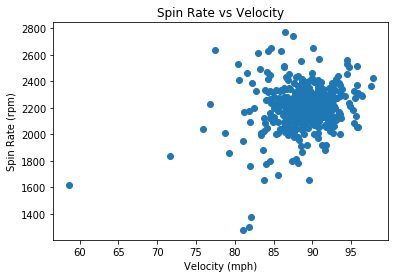

In [97]:
#scatterplot for velocity vs spin rate
plt.scatter(df_2["velocity"], df_2["spin_rate"])
plt.xlabel("Velocity (mph)")
plt.ylabel("Spin Rate (rpm)")
plt.title("Spin Rate vs Velocity")
plt.show()

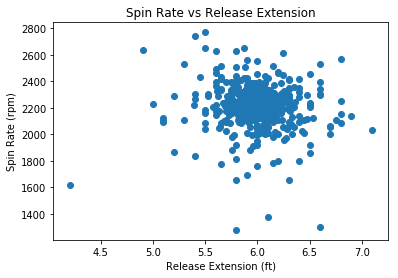

In [98]:
#scatterplot for release extension vs spin rate
plt.scatter(df_2["release_extension"], df_2["spin_rate"])
plt.xlabel("Release Extension (ft)")
plt.ylabel("Spin Rate (rpm)")
plt.title("Spin Rate vs Release Extension")
plt.show()

We see no obvious relationship between *spin rate* and *velocity* or *release extension*. Additionally, if we recall that a total of 5585 home runs were hit in 2018, these two only constitute 0.036% of the total home runs. 
<br>


Let's quickly compare this to the total number of players who hit only one home run, using the **shape** attribute on a subset of df_2 which consists only of players who hit one home run:

In [99]:
df_2[df_2["home_runs" ] ==1].shape

(92, 12)

Here we see that 92 players hit one home run in 2018. So Statcast failed to register the *spin rate* for only 2.17% of the observations for players who hit home runs. This brings us back to the fact that the *spin rate* for each player is the average of each of their home runs. So we can say that *spin rate* is probably not MCAR for this data because only players with one home run had missing data, but it's very likely that it is MCAR for individual home runs, as almost 98% of observations for a single home run successfully registered *spin rate*.

**Note: In pracice, you'd be wise to use a method like [Little's MCAR Test](https://wiki.q-researchsoftware.com/wiki/Missing_Data_-_Little%27s_MCAR_Test) to make a statistically driven decision in situations where you're unsure about what type your missing data is, but we'll pass over it for the sake of saving time.

***

### Deletion <a class="anchor" id="2.2"></a>


Since we've concluded the missing data is MCAR or MAR and the occurrences of missing data are so few, we can use deletion. In this case, we'd simply remove the entire observations with missing data. This is known as *listwise* deletion. 

To do this, we can use the **dropna()** method. We'll store the new DataFrame as df_dropped: 

In [100]:
#use dropna to remove observations with missing data points
df_dropped = df_2.dropna()

In [101]:
print(df_dropped.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 0 to 535
Data columns (total 12 columns):
home_runs            534 non-null int64
player_name          534 non-null object
total_pitches        534 non-null int64
pitch_percent        534 non-null float64
xwoba                534 non-null float64
xba                  534 non-null float64
launch_speed         534 non-null float64
launch_angle         534 non-null float64
spin_rate            534 non-null float64
velocity             534 non-null float64
effective_speed      534 non-null float64
release_extension    534 non-null float64
dtypes: float64(9), int64(2), object(1)
memory usage: 54.2+ KB
None


We see this gets the job done. Instead of having 536 observations, we now have 534 do to the removal of the two with missing values. However, you're losing potentially valuable observations by doing this, so next we'll explore some other methods for dealing with missing data.
***

### Imputation Using Mean or Median  <a class="anchor" id="2.3"></a>
<br>

When we encounter missing data that too valuable or impactful to simply delete, we use imputaion. Imputation is essentially replacing missing values with an estimate. 

An elementary method of imputation is to simply replace the missing data with the average value of that variable, like the mean or median. We can do this easily using *fillna()** and passing it the mean or median (it's generally wiser to use the median unless you have particular reason not to). One downside to simple average imputation is that it doesn't take into account any of the other variables, which often decreases it's accuracy as an estimate considerably. We'll talk about this more in a moment, but let's perform the imputation first with **fillna()**.

*Note: By definition, using an elementary method of interpolation will decrease the overall variance of data for that variable. This is often worth the cost, but you need to be aware of it.*

In [102]:
df_median = df_2.fillna(df_2.median())

Now let's look at the info of the dataframe and call **isnull()** again to check if the missing data has been replaced:

In [103]:
df_median[df_median.isnull().any(axis=1)]

,home_runs,player_name,total_pitches,pitch_percent,xwoba,xba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,release_extension


That did it! However, we ought to check to make sure **fillna()** replaced the missing values with the median and not some other value. Let's use **median()** on the original df_2 to see what the new value should be and compare it to the replaced values in df_median.

In [104]:
df_2["spin_rate"].median()

2215.0

In [105]:
df_median.iloc[472:474]

,home_runs,player_name,total_pitches,pitch_percent,xwoba,xba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,release_extension
472,1,Mitch Walding,87,1.1,1.448,0.724,103.9,33.0,2215.0,61.0,59.2,5.2
473,1,Yandy Diaz,470,0.2,1.149,0.629,99.8,29.0,2215.0,81.5,80.0,5.2


We can now be sure it correctly replaced the missing values with the median. We should now take the time to focus on the inaccuracy of this method. Looking at these two imputed values, we should be able to see why this method was inaccurate. Remember a bit earlier when we talked about these two home runs? Here's [Yandy](https://youtu.be/55-3_wMVWR4?t=267) and [Mitch's](https://youtu.be/WBeGNZnDuNI?t=435) in case you forgot. We noted that these two home runs were hit under very different circumstances; Yandy hit his home run off an 81.5 mph ball thrown by a pitcher, while Mitch's was off a 61 mph pitch thrown by a position player. It's *highly* unlikely that those pitches had similar spin rates, yet we just estimated them as being equal.I would guess that Yandy's is a much better estimate than Mitch's Unfortunately, we often won't have access to the additional information (like knowing about the position player pitching scenario) to help us make these distinctions.


Nonetheless, the imputation using the medi was sucessful. Next we'll take a look at a great method for imputation which *does* take into account the other variables.


_Note: One should always briefly check the data types in this **info()** method before moving forward to make sure that each variable is the correct datatype. Use the **astype()** method on the variable to change it if necessary._


In [106]:
print(df_median.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 12 columns):
home_runs            536 non-null int64
player_name          536 non-null object
total_pitches        536 non-null int64
pitch_percent        536 non-null float64
xwoba                536 non-null float64
xba                  536 non-null float64
launch_speed         536 non-null float64
launch_angle         536 non-null float64
spin_rate            536 non-null float64
velocity             536 non-null float64
effective_speed      536 non-null float64
release_extension    536 non-null float64
dtypes: float64(9), int64(2), object(1)
memory usage: 50.3+ KB
None


***
## Imputation Using the KNN Algorithm   <a class="anchor" id="2.4"></a>
<br>

The last method we're going to explore is the K-Nearest Neighbors (KNN) algorithm. Though deletion was a valid option in this case, I want to share a better option for estimation than simply imputing the median. This method will also hopefully give you a bit of a taste for some of the amazing techniques available at our fingertips with python and DataFrames. There are a myriad of uses for K-NN (including supervised machine learning), but imputation for missing data is a great example for the scope of this guide. I would highly recommend you take the time to read about it [here](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/).

<br>
<img src="knn.png" alt="Drawing" style="width: 500px;"/>
<br>

K-NN is particularly useful for imputing missing data when it's MNAR (missing not at random) and you don't explicitly know its relationship with the other variables, as it imputes values based on comparison with other observations and variables that have similar values. Here's a great case study in [The use of KNN for Missing Values](https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637). When we use KNN for imputation, it will use the k most similar observations in order to estimate the missing value. In the image above, we see the KNN algorithm will classify the unknown (red) dot as purple when k=3 but will classify it as yellow when k=6. Tying this to our case, let's say we're using KNN to impute a missing value for *spin rate* in a DataFrame that only has *spin rate* and *velocity*. If we choose k=5, the algorithm will look at the five observations with *velocity* most similar to the value of *velocity* in the observation missing *spin rate, and use that to estimate the missing *spin rate* value.

Be aware that KNN has some drawbacks, as it requires a much more computational power than the other methods we discussed. Additionally, one needs to choose an optimal value for K to balance the [tradeoff of bias and variance](http://scott.fortmann-roe.com/docs/BiasVariance.html) of your model. This is an area with a lot to talk about, but since we don't want to get too bogged down right now in the theory we'll stick with the default K = 3 in this case. It won't be an optimal estimate, but should still demonstrate the value of KNN by being more accurate than the median.

<br>

We're going to use a couple new packages in this section, one of them being [fancyimpute](https://pypi.org/project/fancyimpute/). fancyimpute is a package with a built-in KNN imputation method, **fit_transform()**. However, this method doesn't work on pandas DataFrames, it's only for [NumPy Arrays](https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html). If you're not familiar with the NumPy array, change that. It's one of the most common data types in python and has some key differences to pandas DataFrames:

1. Pandas DataFrames are 2-dimensional array objects, while NumPy arrays are multidimensonal (between 1 and theoretically no upper limit in dimensionality)
2. Pandas DataFrames may have heterogeneous data types and labels (column names), while all values in a NumPy array must be of the same data type.

Because of this, there are a few tradeoffs betweem the two and the're used in different circumstances. 

Now we can import fancyimpute and numpy to get to work:



In [107]:
## import knn
from fancyimpute import KNN
import numpy as np

Let's look once more at our df_2, which still has the missing values. Note that these two observations correspond to row indexes 472 and 473.

In [108]:
# Check again for null values in df_2
df_2[df_2.isnull().any(axis=1)]

,home_runs,player_name,total_pitches,pitch_percent,xwoba,xba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,release_extension
472,1,Mitch Walding,87,1.1,1.448,0.724,103.9,33.0,NaN,61.0,59.2,5.2
473,1,Yandy Diaz,470,0.2,1.149,0.629,99.8,29.0,NaN,81.5,80.0,5.2


Now let's trim down our DataFrame. Remember, *spin rate* is only related to pitching, so we only want to consider the other pitching variables when looking for similarities with our KNN imputation.

In [109]:
#subset df_2 with only pitching related variables
pitching_df = df_2.loc[:, ["spin_rate", "velocity", "effective_speed","release_extension"]].copy()
pitching_df.head()

,spin_rate,velocity,effective_speed,release_extension
0,2269.0,89.6,89.01,5.93
1,2118.0,88.8,88.46,6.05
2,2164.0,88.6,88.14,5.96
3,2192.0,91.6,91.37,6.09
4,2203.0,87.8,87.11,5.90


<br>

Now that we have the only variables we want, we use **np.array()** on df_2 to convert it to a NumPy array:

In [110]:
# convert df_2 to numpy array
pitching_array = np.array(pitching_df)
pitching_array

array([[2269.  ,   89.6 ,   89.01,    5.93],
       [2118.  ,   88.8 ,   88.46,    6.05],
       [2164.  ,   88.6 ,   88.14,    5.96],
       ...,
       [2099.  ,   87.4 ,   84.5 ,    5.1 ],
       [2071.  ,   91.6 ,   91.  ,    6.  ],
       [2284.  ,   88.3 ,   88.1 ,    6.  ]])

We can see it actually looks quite similar to the DataFrame, but it's now stored in an outer array, where each observations in df_2 is an array within the outer array. We've also lost the variable names and now only have the values.

<br>

Let's use the **isnan()** NumPy function (not a method) on pitching_array to make sure it still has those null values:
<br>

*Note: **np.isnan()** means that **isnan()** is a function that's specific to NumPy (remember we imported NumPy as np).*

In [111]:
np.isnan(pitching_array).any()

True

Now that we're confident as to the integrity of the pitching_array, it's time to impute! Call the **KNN.fit_transform()** to impute the missing values:

In [112]:
array_filled = KNN(k=3).fit_transform(pitching_array)
array_filled

Imputing row 1/536 with 0 missing, elapsed time: 0.073
Imputing row 101/536 with 0 missing, elapsed time: 0.073
Imputing row 201/536 with 0 missing, elapsed time: 0.074
Imputing row 301/536 with 0 missing, elapsed time: 0.074
Imputing row 401/536 with 0 missing, elapsed time: 0.074
Imputing row 501/536 with 0 missing, elapsed time: 0.075


array([[2269.  ,   89.6 ,   89.01,    5.93],
       [2118.  ,   88.8 ,   88.46,    6.05],
       [2164.  ,   88.6 ,   88.14,    5.96],
       ...,
       [2099.  ,   87.4 ,   84.5 ,    5.1 ],
       [2071.  ,   91.6 ,   91.  ,    6.  ],
       [2284.  ,   88.3 ,   88.1 ,    6.  ]])

Did it work? Let's call **np.isnan()** again:

In [113]:
np.isnan(array_filled).any()

False

So we can be confident that **KNN.fit_transform()** imputed something into those missing values, but are they correct? Let's [subset the array](https://pythontic.com/numpy/ndarray/extract%20subsets) to see what the new values are:

In [114]:
## See if it filled
array_filled[472:474, 0]

array([1640.19146954, 2023.44433479])

We see that **KNN.fit_transform()** imputed 1640.2 and 2023.4 as the missing *spin rate* values. Let's compare these to the values imputed using the median.

In [115]:
df_median.iloc[472:474]

,home_runs,player_name,total_pitches,pitch_percent,xwoba,xba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,release_extension
472,1,Mitch Walding,87,1.1,1.448,0.724,103.9,33.0,2215.0,61.0,59.2,5.2
473,1,Yandy Diaz,470,0.2,1.149,0.629,99.8,29.0,2215.0,81.5,80.0,5.2


Interestingly, both imputed values are lower than median. Where we really see a large improvement in comparison to the median is that the KNN algorithm imputed a much lower value to *spin rate* for Mitch than for Yandy, as we predicted was the case.


Now that we've verified the validity of the KNN imputation, we need to get the imputed values back into the DataFrame. Let's first make a copy of df_2. Remember when I said to use **copy()** when you do this, now I'm going to demonstrate why by leaving it out:

In [116]:
#create df_3 without using copy
df_3 = df_2
df_3[df_3.isnull().any(axis=1)]

,home_runs,player_name,total_pitches,pitch_percent,xwoba,xba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,release_extension
472,1,Mitch Walding,87,1.1,1.448,0.724,103.9,33.0,NaN,61.0,59.2,5.2
473,1,Yandy Diaz,470,0.2,1.149,0.629,99.8,29.0,NaN,81.5,80.0,5.2


Now we can loop through df_2 with the [**iterrows()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html) method. We check for the null values in df_2 and replace the same null value in df_3 with the KNN imputed values from array_filled. We need to change the values in a different DataFrame than df_2 because the [iterator will often return a copy and not actually change the values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html).

In [117]:
#loop through df_2, returning rows and indexes
for index, row in df_2.iterrows():
    
    #check if the value for spin rate is null. 8 is the column index for spin_rate
    if(pd.isnull(row[8])):
        
        #replace the null value in df_4 with the KNN imputed value from array_filled
        df_3.iloc[index, 8] = array_filled[index, 0]

This didn't raise a [SettingWithCopyWarning](https://www.dataquest.io/blog/settingwithcopywarning/), but it should've (I'm linking it again because it's so important). First let's see if the loop worked and removed the missing data from df_3:

In [118]:
df_3.iloc[[472, 473]]

,home_runs,player_name,total_pitches,pitch_percent,xwoba,xba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,release_extension
472,1,Mitch Walding,87,1.1,1.448,0.724,103.9,33.0,1640.191470,61.0,59.2,5.2
473,1,Yandy Diaz,470,0.2,1.149,0.629,99.8,29.0,2023.444335,81.5,80.0,5.2


It worked! Now let's take the same look at df_2, the DataFrame we didn't impute and should still have missing values:

In [119]:
df_2.iloc[[472, 473]]

,home_runs,player_name,total_pitches,pitch_percent,xwoba,xba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,release_extension
472,1,Mitch Walding,87,1.1,1.448,0.724,103.9,33.0,1640.191470,61.0,59.2,5.2
473,1,Yandy Diaz,470,0.2,1.149,0.629,99.8,29.0,2023.444335,81.5,80.0,5.2


Notice that the missing values were replaced in df_2 as well. This is what the SettingWithCopyWarning was about! When we copied df_2 to df_3 we did it like this:

df_3 = df_2

In actuality, python doesn't create and store a new DataFrame in memory on this command, it just recognizes df_3 as a new name for df_2, and both access the same DataFrame object in memory. So when we placed the imputed values into df_3, it changed the same DataFrame that df_2 access. This is called a [shallow copy](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-part-4-c4216f84d388).

We can call the *id* function on both df_2 and df_3 to confirm this. Unique objects have unique ids:


In [120]:
print(id(df_2), id(df_3))


2454366351256 2454366351256


We see they're indeed the same! By failing to use **copy()** we irrevocably changed df_2. If we were to run any of the code above, even code which took place before the shallow copy was made, it would show no missing data and ruin all the iputations we performed. It's absotuely crucial that you not make this mistake. In fact, we're going to use **del** to delete df_2 completely, that way we don't risk using it anymore.

In [121]:
del df_2

In [122]:
df_2.head()

NameError: name 'df_2' is not defined

It's gone!

Now that we've demonstrated the risk of shallow copies, we'll show how to avoid it. To create a deep copy, use the **.copy()** method on the DataFrame you wish to copy like this:

In [129]:
#create DataFrame df_knn using copy
df_knn = df_3.copy()

#print object ids again
print(id(df_knn), id(df_3))

2454368835456 2454366351256


Notice how that time it created a new object df_knn, which has a unique id! This image summarizes this idea:
<br>
<br>

<img src="copying-dataframes.png" alt="Drawing" style="width: 750px;"/>
<br>
<br>
On the left side we see the shallow copy. Any changes made to df1 or df2 in that image will occur for the other, as they're both the *same* object. On the right, we see a deep copy, like we just made using **copy()**. They're not connected at all!
<br>
<br>


In [130]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 12 columns):
home_runs            536 non-null int64
player_name          536 non-null object
total_pitches        536 non-null int64
pitch_percent        536 non-null float64
xwoba                536 non-null float64
xba                  536 non-null float64
launch_speed         536 non-null float64
launch_angle         536 non-null float64
spin_rate            536 non-null float64
velocity             536 non-null float64
effective_speed      536 non-null float64
release_extension    536 non-null float64
dtypes: float64(9), int64(2), object(1)
memory usage: 50.3+ KB


Looks good! Before we lay our chapter on missing data to rest, let's do a bit of housekeeping. Remember:
<br>
1. df_dropped has 534 observations, as it completely removed the two observations with missing values
2. df_median has 536 observations, with the missing *spin rate* values replaced by the median of the rest of the *spin rate* values.
3. df_knn has 536 observations, with the missing values replaced using the KNN algorithm which looked at pitching values from *velocity*, *effective speed*, and *release_extension* to estimate what the *spin rate* was for those pitches


Just to show off one more method, we can use **equals()** to compare two DataFrames to see if they're the same.

In [131]:
print(df_dropped.equals(df_knn), df_dropped.equals(df_median), df_knn.equals(df_median))

False False False


Before we lay this chapter to rest, I want to briefly reiterate that the best method for imputation is dependent on the specific type of data and nature of the missing data. We didn't even touch on many of the methods for imputation, inlcuding [Multiple Imputation](https://www.theanalysisfactor.com/multiple-imputation-in-a-nutshell/) and regression. This is a fantastic read by UCLA on a variety of imputation methods including [multiple imputation](https://stats.idre.ucla.edu/stata/seminars/mi_in_stata_pt1_new/). These are for another lesson, for now we'll just move on to outliers.

***
### **Chapter 3   <a class="anchor" id="3.0"></a>**
### **Outliers**

<br>
<br>

Now that our DataFrame is trimmed and free of missing values, we need to start looking at the data itself. When we want to decide which values are outliers and what to do with them, we must first have an understanding of the distribution of the variable that value belongs to. 

Let's use **describe()** on *launch_angle* to get a look at the distribution of the launch angle values.

In [132]:
df_knn["launch_angle"].describe()

count    536.000000
mean      27.965112
std        2.893143
min       19.000000
25%       26.075000
50%       28.000000
75%       29.600000
max       40.000000
Name: launch_angle, dtype: float64

We see output that includes the mean, standard deviation, min/max, and percentiles. As we've come to expect, the pandas DataFrame allows us to use this **describe()** quite conveniently on the entire DataFrame:

In [133]:
df_summary = df_knn.describe()
df_summary

,home_runs,total_pitches,pitch_percent,xwoba,xba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,release_extension
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.00000,536.000000
mean,10.419776,1287.123134,0.816231,1.275688,0.684394,102.860075,27.965112,2206.652306,88.750000,88.31959,5.994757
std,9.504800,821.801265,0.599920,0.319978,0.153013,2.835155,2.893143,161.200970,3.580393,3.76780,0.281646
min,1.000000,12.000000,0.100000,0.063000,0.042000,92.300000,19.000000,1280.000000,58.600000,56.50000,4.200000
25%,2.750000,544.500000,0.500000,1.091750,0.600500,101.300000,26.075000,2136.750000,87.400000,86.78750,5.870000
50%,8.000000,1243.000000,0.700000,1.321000,0.706500,103.000000,28.000000,2214.500000,89.000000,88.60500,6.000000
75%,16.000000,1965.250000,1.000000,1.482000,0.780250,104.600000,29.600000,2287.000000,90.700000,90.34250,6.130000
max,48.000000,3009.000000,8.300000,1.990000,0.987000,111.900000,40.000000,2770.000000,97.800000,97.10000,7.100000


We see python creates a new pandas DataFrame which now consists of the summary statistics for each variable. Notice that **describe()** removed the *names* variable. This is because the *include* variable of **describe()** defaults to only including numeric columns. We could keep *names* like this:

In [134]:
df_summary_all = df_knn.describe(include = "all").head()

This adds *unique*, *top*, and *freq* to the DataFrame. Since there are no repeated names, this is pretty useless. Let's use **del** to delete df_summary_all:

In [135]:
del df_summary_all

***
### Visualization for Univariate Outliers   <a class="anchor" id="3.1"></a>

I don't know about you, but I can't really tell if there's outliers just by looking at the summary statistics! Though these are useful, we need to visualize the data in order to make informed decisions about it. A couple easy way to do this (for continuous data) are to use histograms and boxplots. Fortunately, our old friend pyplot is made just for this! 

<br>

First, we'll do a [histogram](https://pythonspot.com/matplotlib-histogram/) of *launch angle*:

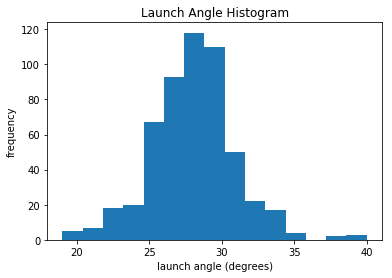

In [136]:
#histogram for launch angle
plt.hist(df_knn["launch_angle"], bins = 15)
plt.xlabel("launch angle (degrees)")
plt.ylabel("frequency")
plt.title("Launch Angle Histogram")
plt.show()

We see that the mean of launch angle looks to be around 28 degrees. This is consistent with df_summary, which lists it as 27.97 degrees. We can also see a gap around 36 degrees before a few more leading up to 40. Let's take the next step and look at a boxplot for *launch angle*. If you need a refresher with boxplots, they're absolutely crucial and you can quickly learn about them [here](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51).

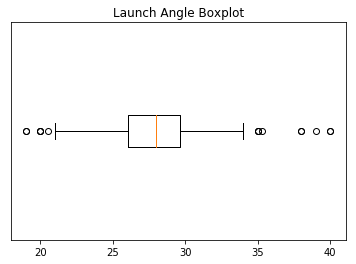

In [137]:
#boxplot for launch angle
plt.boxplot(df_knn["launch_angle"], vert=False)
plt.title("Launch Angle Boxplot")
plt.yticks([])
plt.show()

We can see outliers on both the low and high end of the distribution. We'll discuss what we'll do about these outliers soon. But first, let's print out histograms and boxplots for every variable except for *names*. We're going to take our visualizations to the next level with the **seaborn** library. [**seaborn**](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) is based on **matplotlib**, but has much better interaction with pandas DataFrames and additional functionality to make it much better looking. [Here](https://seaborn.pydata.org/examples/index.html) are some great examples of a variety of seaborn plots.

We're going iterate though df_knn and use seaborn to plot the histograms, boxplots, and summary statistics of each variable. 

*Note: We use [subplots](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html) to display the histograms and boxplots next to each other. This is an extremely useful concept which can greatly expand your possibilities when plotting.

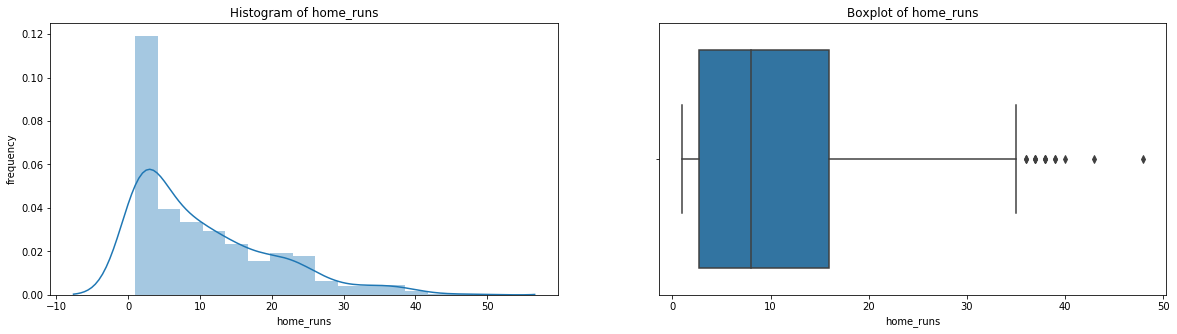


count    536.000000
mean      10.419776
std        9.504800
min        1.000000
25%        2.750000
50%        8.000000
75%       16.000000
max       48.000000
Name: home_runs, dtype: float64


player_name is not a numerical variable




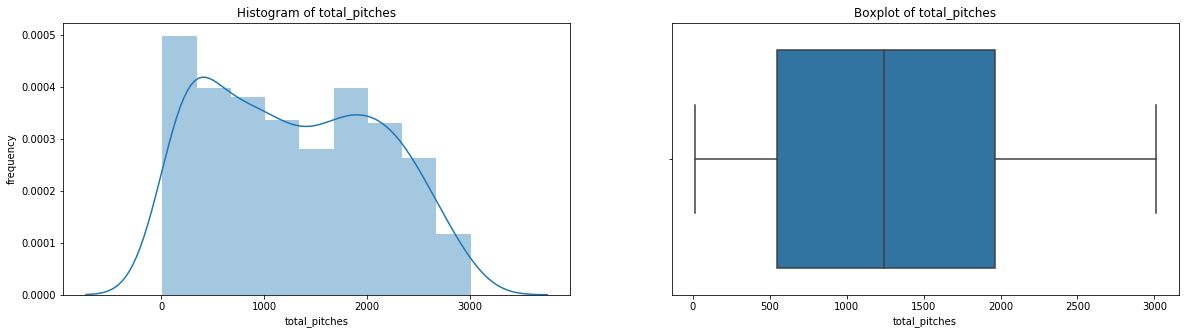


count     536.000000
mean     1287.123134
std       821.801265
min        12.000000
25%       544.500000
50%      1243.000000
75%      1965.250000
max      3009.000000
Name: total_pitches, dtype: float64




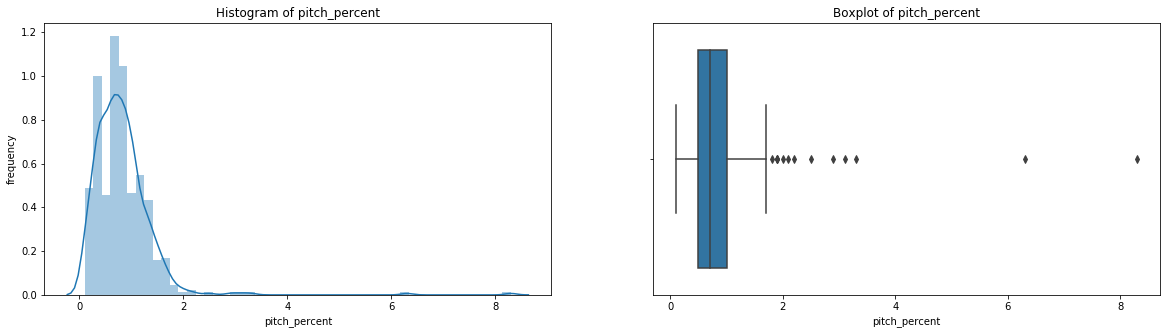


count    536.000000
mean       0.816231
std        0.599920
min        0.100000
25%        0.500000
50%        0.700000
75%        1.000000
max        8.300000
Name: pitch_percent, dtype: float64




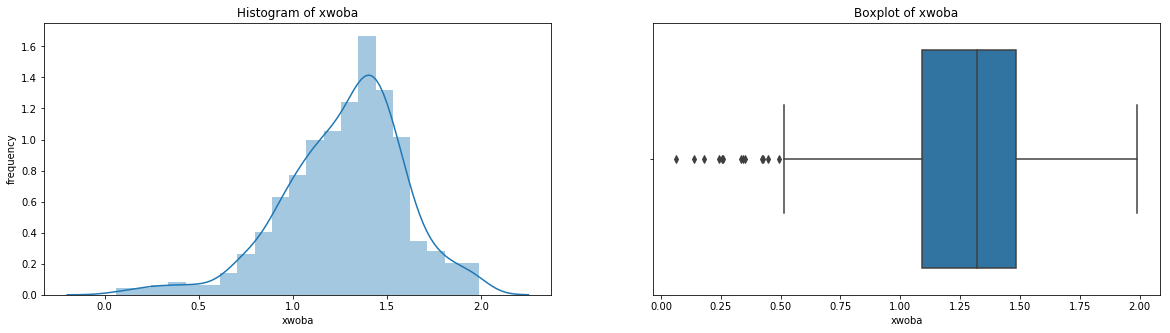


count    536.000000
mean       1.275688
std        0.319978
min        0.063000
25%        1.091750
50%        1.321000
75%        1.482000
max        1.990000
Name: xwoba, dtype: float64




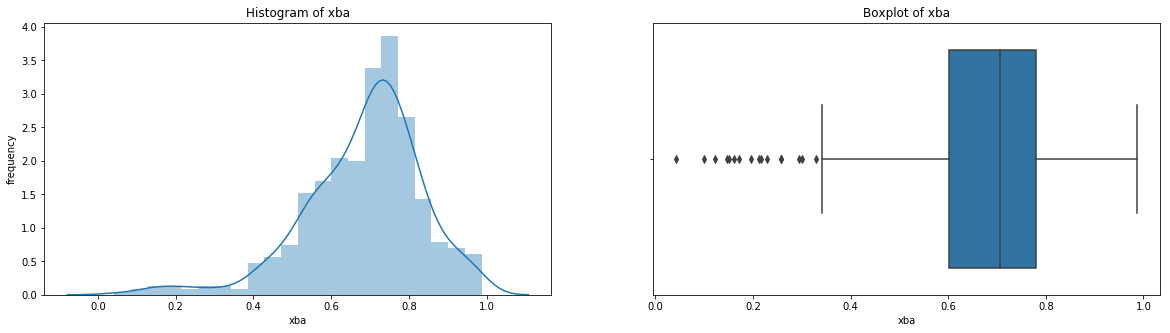


count    536.000000
mean       0.684394
std        0.153013
min        0.042000
25%        0.600500
50%        0.706500
75%        0.780250
max        0.987000
Name: xba, dtype: float64




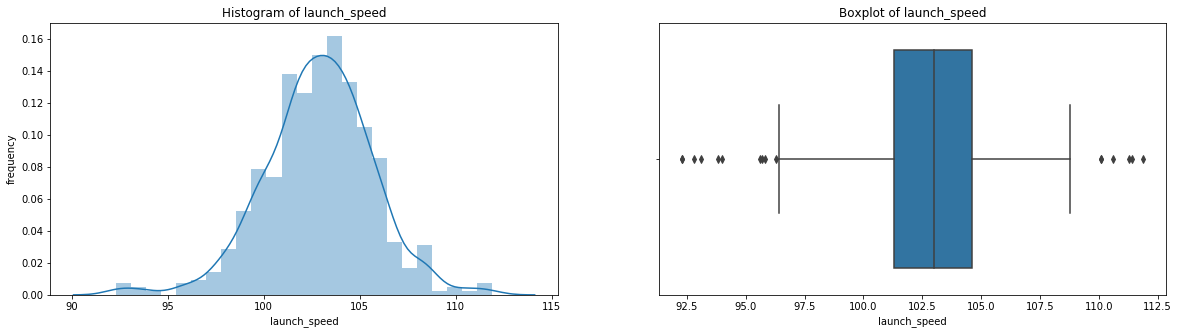


count    536.000000
mean     102.860075
std        2.835155
min       92.300000
25%      101.300000
50%      103.000000
75%      104.600000
max      111.900000
Name: launch_speed, dtype: float64




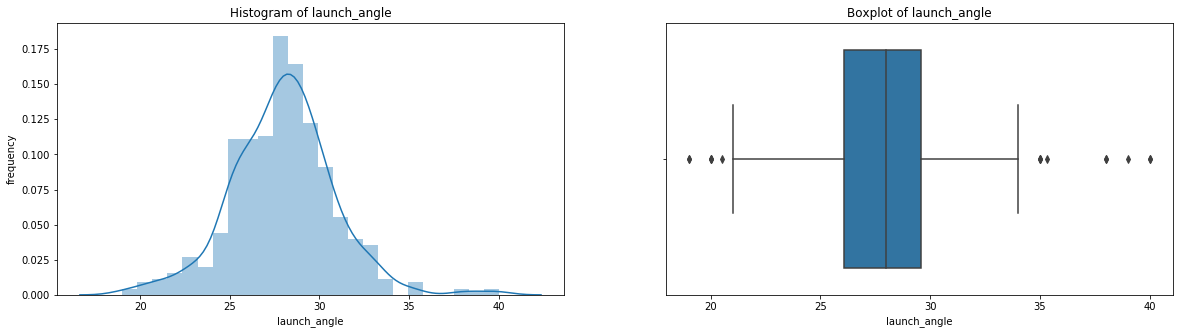


count    536.000000
mean      27.965112
std        2.893143
min       19.000000
25%       26.075000
50%       28.000000
75%       29.600000
max       40.000000
Name: launch_angle, dtype: float64




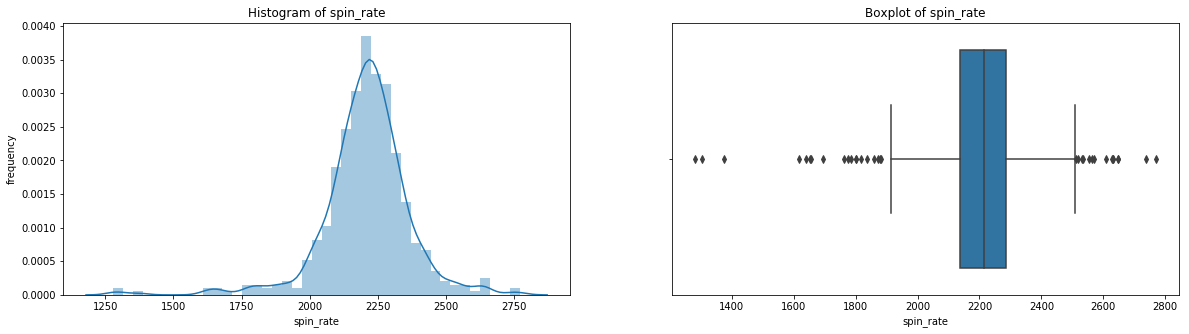


count     536.000000
mean     2206.652306
std       161.200970
min      1280.000000
25%      2136.750000
50%      2214.500000
75%      2287.000000
max      2770.000000
Name: spin_rate, dtype: float64




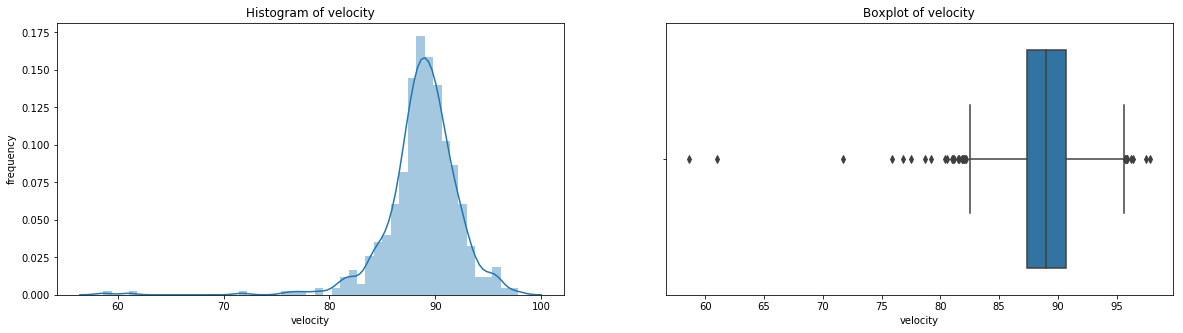


count    536.000000
mean      88.750000
std        3.580393
min       58.600000
25%       87.400000
50%       89.000000
75%       90.700000
max       97.800000
Name: velocity, dtype: float64




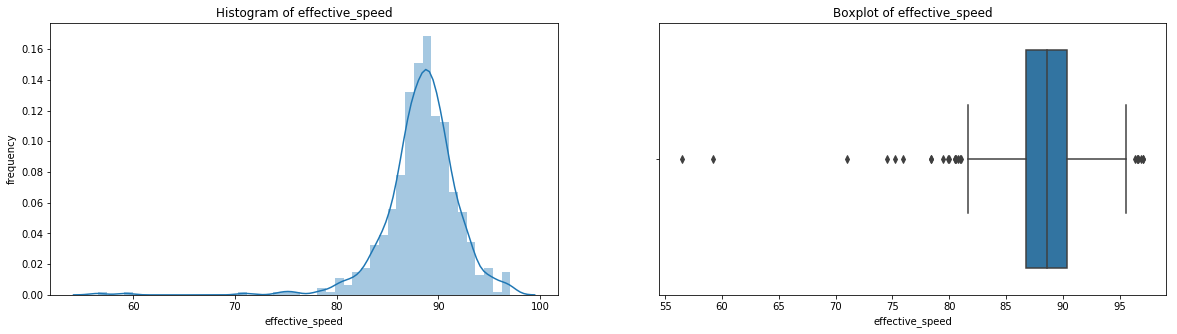


count    536.00000
mean      88.31959
std        3.76780
min       56.50000
25%       86.78750
50%       88.60500
75%       90.34250
max       97.10000
Name: effective_speed, dtype: float64




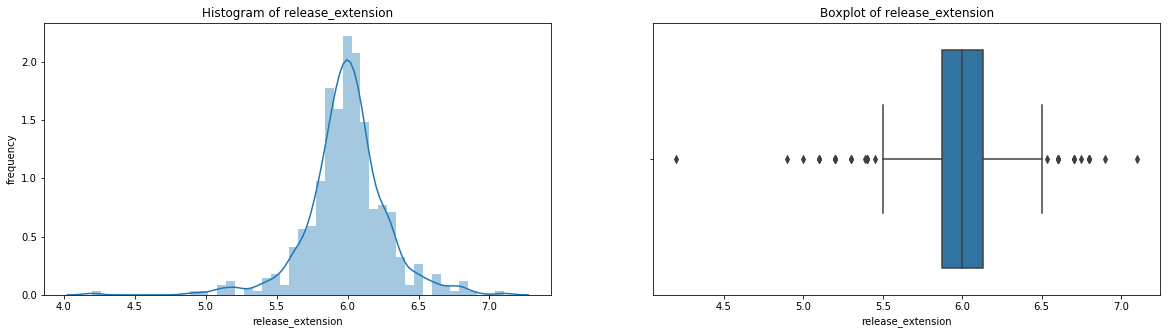


count    536.000000
mean       5.994757
std        0.281646
min        4.200000
25%        5.870000
50%        6.000000
75%        6.130000
max        7.100000
Name: release_extension, dtype: float64




In [138]:
# import seaborn
import seaborn as sns

#loop through columns of df_knn
for x in df_knn:
    if (df_knn[x].dtype == 'int64' or df_knn[x].dtype == 'float64') :      #only plots values that are integers or floats
        plt.figure(figsize=(20, 5))                                        #expand figure size to fit two plots comfortably
        plt.subplot(1,2,1)                                                 #creates two subplots in the plot, shaped with one row and two columns, and we're dealing with the first plot
        hist = sns.distplot(df_knn[x])                                     #create histogram
        hist.set_title("Histogram of " + str(x))                        
        hist.set_ylabel(str("frequency"))                           
         
        plt.subplot(1,2,2)                                                 #this is the second plot 
        sns.boxplot(x = df_knn[x], orient="h")                             #orient makes it horizontal
        plt.title("Boxplot of " + str(x))                               
        plt.show()                                                         #show the plot
            
        print("\n" + str(df_knn[x].describe()) + "\n\n")                   #newline, then print the summary statistics for that variable
        
    else: 
        print(str(x) +" is not a numerical variable\n\n")                 #print that the variable isn't an integer or float
        



Having these visualizations makes it much easier to see the distributions of these variables. Some of them have simple linear distributions, while others are normally distributed. We can also see most of the variables have some outliers. One thing we don't know is which observations have muliple outliers. Let's loop through the dataframe and print out the minimum and maximum values for each variable:

In [214]:
# subsets df_knn to only include numeric variables (excludes player_name)

outlier_df = df_knn.loc[:, ['home_runs','total_pitches', 'pitch_percent', 'xwoba',
       'xba', 'launch_speed', 'launch_angle', 'spin_rate', 'velocity',
       'effective_speed', 'release_extension']].copy()

for index, var in outlier_df.iteritems():                                                    #index is a variable name, var is a series
    
    print("The minimum " + str(index)                                                        #the name of the variable
                                                                                              
        + " is " + str(var.min())                                                            #the minimum value of the series
          
        + " by " + str(df_knn["player_name"][outlier_df[index].idxmin()]))                   #uses idxmin to return the index of the series.
                                                                                             #then subset the player_names column of df_knn with that
                                                                                             #index to return the name
            
print("\n")

for index, var in outlier_df.iteritems():                                                    #index is a variable name, var is a series
    
    print("The maximum " + str(index)                                                        #the name of the variable
                                                                                              
        + " is " + str(var.max())                                                            #the minimum value of the series
          
        + " by " + str(df_knn["player_name"][outlier_df[index].idxmax()]))                   #uses idxmin to return the index of the series.
                                                                                             #then subset the player_names column of df_knn with that
                                                                                             #index to return the name

The minimum home_runs is 1 by Chad Wallach
The minimum total_pitches is 12 by A.J. Cole
The minimum pitch_percent is 0.1 by Jon Jay
The minimum xwoba is 0.063 by Nick Martini
The minimum xba is 0.042 by Nick Martini
The minimum launch_speed is 92.3 by Nate Orf
The minimum launch_angle is 19.0 by Rajai Davis
The minimum spin_rate is 1280.0 by Gio Urshela
The minimum velocity is 58.6 by Nick Martini
The minimum effective_speed is 56.5 by Nick Martini
The minimum release_extension is 4.2 by Nick Martini


The maximum home_runs is 48 by Khris Davis
The maximum total_pitches is 3009 by Cesar Hernandez
The maximum pitch_percent is 8.3 by A.J. Cole
The maximum xwoba is 1.99 by Michael Hermosillo
The maximum xba is 0.987 by Michael Hermosillo
The maximum launch_speed is 111.9 by Ryder Jones
The maximum launch_angle is 40.0 by Nick Martini
The maximum spin_rate is 2770.0 by Brandon Drury
The maximum velocity is 97.8 by Dylan Cozens
The maximum effective_speed is 97.1 by Clayton Richard
The maxi

If you look at that ouput, you'll see that Nick Martini's home run had the minimum values for [*xwoba*](https://baseballsavant.mlb.com/expected_statistics), *xba*, *velocity*, *effective speed*, and *release extenstion*, as well as the highest value for *launch angle*. 


### Wanna see what an outlier home run looks like? Here's the [Martini bomb:](https://www.mlb.com/video/martini-s-1st-career-home-run-c2496727383)

If it helps, that pitch was delivered by a position player because the game was out of reach and they didn't want to tire out a pitcher. Nonetheless, if you wanted a definitive example of an outlier, you just saw it!

Aside from the Martini bomb, we now are aware of our outliers and need to decide what to do with them. For that, we'll need to discuss outliers a bit more in depth:

***
### Understanding Outliers  <a class="anchor" id="3.2"></a>
<br>
<br>

When most people think of outliers, they simply imagine data which skews their models or even reduces them to 'bad' values. Though there are cases in which these are certainly true, the reality is both much simpler and much more complex. [Outliers](http://mathworld.wolfram.com/Outlier.html) are simply observations that are 'far' from others. This is often defined as any observation which is more than 1.5 times the IQR above or below the third or first quartiles respectively, with extreme outliers being 3 times the IQR above or below. These are known as [Tukey's Fences](https://en.wikipedia.org/wiki/Outlier#Tukey's_fences).
<br>
<br>

<img src="Box-Plot-Diagram-to-identify-Outliers-figure-1.png" alt="Drawing" style="width: 750px;"/>
<br>
This is the most common definition used statistically for ouliers, but this doesn't actually tell us anything about what to do with the data. You could widen or constrict this definition to include or exclude the entire dataset if you wanted to. This brings us back to the need to think critically as a data scientist and tailor our approach to outliers to the specific needs of the project.
<br>
<br>

For instance, say we're the pitching coach of a baseball team and we've heard about the trend that [batters are changing their swing to increase launch because it helps hit home runs](https://www.washingtonpost.com/news/fancy-stats/wp/2017/06/01/mlb-home-run-spike-shows-statcast-science-is-more-potent-than-steroids/?noredirect=on&utm_term=.d2c2916b9387). We want to help our pitchers avoid giving up home runs, so maybe we'd create a model that looks at pitching statistics which kinds of pitches lead to the most *average* home runs. If we can decrease these home runs, that would likely have a very positive effect on our pitching performance. These goals have strong consequences on the way we treat outliers in our data. We'd definitely want to get rid of home runs like the Martini bomb off a position player, but we also may want to trim our data down to be rid of less drastic cases. If we look back at our boxplot of home runs, maybe we'd get rid of the seven players who hit more than 37 home runs (the traditional high outliers). After all, these players are the best home run hitters in the game and it may not be worth the time to even think about them. We'd also consider removing of any of the one home run observations with a weird pitching value, as we know our pitchers will be throwing relatively normal pitches. You should be able to see how this case would require very specific treatment of outliers. Not only is the criteria for what you consider an outlier and what you choose to do with them specific to this case, it's also specific to each variable.

In comparison, imagine you're working in public relations or advertising for Major League Baseball, and you want to decide which players to promote. You obviously want to keep the top home run hitters in this case, but maybe you'd even want to keep home runs like the Martini bomb because they're so entertaining to watch. What if you wanted to analyze the most unique home runs in 2018? In this case, you'd want to remove some of the opposite observations from the pitching manager case and *only* keep outliers.

<br>
<br>

***
### Visualization for Mulitvariate Outliers   <a class="anchor" id="3.3"></a>

When cleaning DataFremaes, we can't simply look at outliers in regard to individual variables. When variables are related to each other, as is often the case, we have to think about outliers in the context of other variables as well. For instance, while an observation may have an unusually high value for *velocity*, it may be well within the IQR for other variables. To simply delete entire observations based on a single value being an outlier would be irresponsibe and likely drastically alter any model we create.

Let's go back to pitching. We won't focus on effective speed, as it has a near 1:1 relationship with velocity:

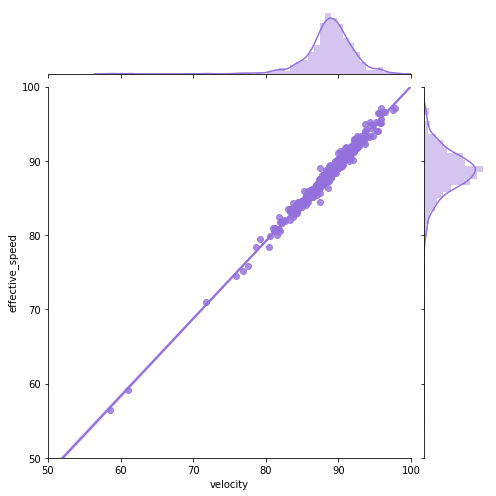

In [215]:
sns.jointplot(df_knn["velocity"], df_knn["effective_speed"], kind="reg", xlim=(50,100), ylim=(50, 100), color="mediumpurple", height=7)
plt.show()

Let's take a look at all the pitching categories and try to draw some conclusions from it.

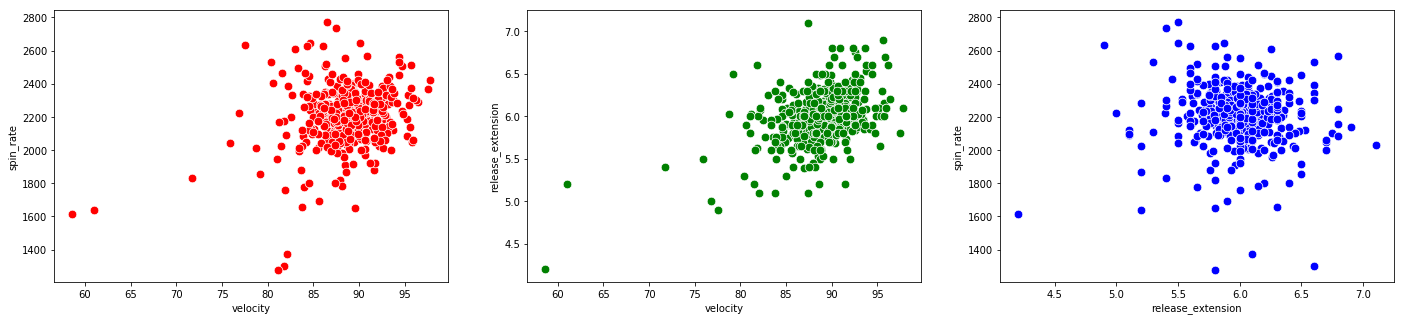

In [141]:
  
f, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(24,5))   

sns.scatterplot(x = "velocity", y = "spin_rate", data=df_knn, ax=axes[0], color="r", s=75)                                                
sns.scatterplot(x = "velocity", y = "release_extension", data=df_knn, ax=axes[1], color="g", s=75)                                           
sns.scatterplot(x = "release_extension", y = "spin_rate", data=df_knn, ax=axes[2],  color="b", s=75)

plt.close(2)
plt.close(3)
plt.close(4)
plt.show()

We see there are data points which are outliers for multiple variables. The Martini bomb is the observation in the bottom right of all three graphs. Since we don't have specific goal or a model in place, we'd normally not remove anything. Similar to imputaion, removing outliers decreases variance and you're no longer dealing with the original dataset. If you're not sure what to do with an outlier, keep it for the time being. You can always remove them later, but you can't put an obersvation back in once you remove it (not conveniently). 


Again, we don't have time to go too far into depth about the theory concerning outliers, but here's a great read on [deciding whether or not to remove outliers](https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/) if you need somewhere to start. Nonetheless, we'll demonstrate a few pandas DataFrame tricks so you can remove what you choose!

***
### Removing Outliers Using IQR   <a class="anchor" id="3.4"></a>


Since we don't have any particular goals, we're going to have to define our own somewhat arbitrarily. Let's say our goal is to remove the observations that are farthest from the average. So home runs like the Martini Bomb will have to go. Let's create a few rules in order to do this:

1. We won't consider the number of home runs when choosing outliers. Khris Davis deserves to stay, and the players that hit more than a few shouldn't have any particularly strange values (remember it takes the average).
3. We won't consider name (obviously).
4. We won't consider effective speed, as it's almost exaclty the same as velocity.
<br>
<br>

Now we need a specific decision rule in order to define outliers and when we'll remove them:: <br>
**We'll remove an obeservation if it has at least three values outside of the $2\cdot$ IQR fences above and below the IQR or at least two values outside of the $2\cdot$ IQR fences. This is a simple form of weighting outliers, where values further from the average are more likely to be removed.**


First, let's remove the home runs, names, and effective speed columns:

In [216]:
df_out1 = df_knn.drop(columns = ["home_runs", "total_pitches","pitch_percent","player_name", "velocity"])
df_out1.head()

,xwoba,xba,launch_speed,launch_angle,spin_rate,effective_speed,release_extension
0,1.671,0.861,105.9,27.3,2269.0,89.01,5.93
1,1.537,0.792,105.0,28.2,2118.0,88.46,6.05
2,1.588,0.806,107.7,29.4,2164.0,88.14,5.96
3,1.152,0.620,101.3,28.8,2192.0,91.37,6.09
4,1.543,0.809,106.5,28.0,2203.0,87.11,5.90


Next, let's look at the summary once more to see those percentiles:

In [217]:
df_summary

,home_runs,total_pitches,pitch_percent,xwoba,xba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,release_extension
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.00000,536.000000
mean,10.419776,1287.123134,0.816231,1.275688,0.684394,102.860075,27.965112,2206.652306,88.750000,88.31959,5.994757
std,9.504800,821.801265,0.599920,0.319978,0.153013,2.835155,2.893143,161.200970,3.580393,3.76780,0.281646
min,1.000000,12.000000,0.100000,0.063000,0.042000,92.300000,19.000000,1280.000000,58.600000,56.50000,4.200000
25%,2.750000,544.500000,0.500000,1.091750,0.600500,101.300000,26.075000,2136.750000,87.400000,86.78750,5.870000
50%,8.000000,1243.000000,0.700000,1.321000,0.706500,103.000000,28.000000,2214.500000,89.000000,88.60500,6.000000
75%,16.000000,1965.250000,1.000000,1.482000,0.780250,104.600000,29.600000,2287.000000,90.700000,90.34250,6.130000
max,48.000000,3009.000000,8.300000,1.990000,0.987000,111.900000,40.000000,2770.000000,97.800000,97.10000,7.100000


Now, we're going to use **quantile()** on df_out1 to get the first and third quartiles. If you have any confusion about the distinction between quantiles, quartiles, and percentiles, you can get a quick refresher [here](https://stats.stackexchange.com/questions/156778/percentile-vs-quantile-vs-quartile).

In [218]:
#create series with IQR

Q1 = df_out1.quantile(0.25)
Q3 = df_out1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

xwoba                  0.39025
xba                    0.17975
launch_speed           3.30000
launch_angle           3.52500
spin_rate            150.25000
effective_speed        3.55500
release_extension      0.26000
dtype: float64


The **quantile()** method is super convenient and returns a series of quantiles, one for each variable. When we use Q3 and Q1 to caluclate the IQR, it does so for each variable and also returns a series of IQRs.

<br>

Now let's use these quantiles to get a DataFrame without the outliers. We're going to make two new DataFrames, one which uses the $2\cdot$ IQR fence, and one which uses the $3\cdot$ IQR fence. To do this, instead of *removing* outliers, we're only going to *keep* vales which aren't outliers. To make sure we're clear, let's look at the $2\cdot$ IQR example:
<br>

To create df_out2 below, we are subsettimg df_out1. This subsetting method will look at the value of each variable, and only keep the ones that are greater than or equal to Q1 - $2\cdot$ IQR *and* less than or equal to <br>
Q3 + $2\cdot$ IQR for the specific quantiles and IQR of that variable. So df_out2 will only include the values that aren't outliers. Let's do it:

In [219]:
# create new df_out2 which removes outliers
df_out2 = df_out1[(df_out1 >= (Q1 - 2 * IQR)) & (df_out1 <= (Q1 + 2 * IQR))]
df_out2.tail()

,xwoba,xba,launch_speed,launch_angle,spin_rate,effective_speed,release_extension
531,0.605,0.413,97.9,23.0,2281.0,91.4,6.0
532,0.994,0.708,102.8,21.0,NaN,91.7,NaN
533,0.968,0.513,98.6,27.0,2099.0,84.5,NaN
534,1.776,0.905,103.6,26.0,2071.0,91.0,6.0
535,NaN,NaN,NaN,23.0,2284.0,88.1,6.0


We see there are some missing values at the bottom of df_out2, so it worked! Let's do the same with the 3*IQR fence and create df_out3:

In [220]:
df_out3 = df_out1[(df_out1 >= (Q1 - 3 * IQR)) & (df_out1 <= (Q1 + 3 * IQR))]
df_out3.tail()

,xwoba,xba,launch_speed,launch_angle,spin_rate,effective_speed,release_extension
531,0.605,0.413,97.9,23.0,2281.0,91.4,6.0
532,0.994,0.708,102.8,21.0,2570.0,91.7,NaN
533,0.968,0.513,98.6,27.0,2099.0,84.5,5.1
534,1.776,0.905,103.6,26.0,2071.0,91.0,6.0
535,0.242,0.195,94.0,23.0,2284.0,88.1,6.0


Expectedly, we see that there are fewer removed outliers, as we made the definition of an outlier more strict in this case.

<br>
Now it's time to remove observations based on the decision rule. This mean's we'll remove an observation from our original df_knn if that observation has three or more missing values in df_out2 *or* two or more missing values in df_out3. As we did in the other cases, we'll do the opposite and only keep observations that don't fit this criteria:

In [221]:
# subset df_knn by removing observations in df_out2 with 3 or more NA and observations in df_out3 with 2 or more NA
df_no_out1 = df_knn[(df_out2.isnull().sum(axis=1) < 3) & (df_out3.isnull().sum(axis=1) < 2)]
df_no_out1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 534
Data columns (total 12 columns):
home_runs            511 non-null int64
player_name          511 non-null object
total_pitches        511 non-null int64
pitch_percent        511 non-null float64
xwoba                511 non-null float64
xba                  511 non-null float64
launch_speed         511 non-null float64
launch_angle         511 non-null float64
spin_rate            511 non-null float64
velocity             511 non-null float64
effective_speed      511 non-null float64
release_extension    511 non-null float64
dtypes: float64(9), int64(2), object(1)
memory usage: 51.9+ KB


We now have a DataFrame with only 511 rows with all non-null values, meaning it removed 25 values our decision rule deemed to be outliers. Remember we can widen or shrink this net by changing our decision rule.

***
### Removing Outliers Using z-score   <a class="anchor" id="3.5"></a>

This last section of our chapter on outliers will do a similar operation, this time using z-score instead of IQR. If you're not familiar with the z-score, you can learn more about it [here](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/).

<br>

<img src="z-score.jpg" alt="Drawing" style="width: 750px;"/>
<br>

The z-score (or z-value) of a value is how many standard deviations it is away from the mean, where the distribution is scaled to a standard normal, meaning it has a mean of 0 and a standard devation of 1. Where it gets really helpful is that we can always say exactly what percent of the values in the distribution are below and above that z-value. For instance, if one of our values has a z-score of -2, we know that only 2.3% of values in the distribution are at that value or below, while the other 97.7% are above that. You should be able to see why this can be quite useful for outliers, as it lets us chose the exact cutoffs for outliers based on percentages!
<br>

For the sake of ease, we'll apply a nearly identical decision rule for removing outliers using z score: **We'll remove an obeservation if it has at least three z-scores with an absolute value above 2 (meaning it's above 2 or below -2) or at least two z-scores with an absolute value above 3.**

We can calculate the z-scores manually, but we should always check first to see if there's a pre built function to do it for us! As expected I found zscore function from the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) module which will automaticall transform all values in a DataFrame or numPy array to z-scores:

In [222]:
# import
from scipy.stats import zscore


Lets work with the same subset of df_knn we used for the IQR method, df_out1. Remember this subset left out *pitch_count*, *home_runs*, *player_names*, and *effective_speed**. We'll make a copy so we don't mess wiht the original:

In [223]:
#create copy of df_out1: df_z1
df_out1_copy = df_out1.copy()

In [224]:
#apply zscore to df_z1 to return a df of z-scores
df_z1 = df_out1_copy.apply(zscore)
df_z1.head()

,xwoba,xba,launch_speed,launch_angle,spin_rate,effective_speed,release_extension
0,1.236586,1.155269,1.073227,-0.230107,0.387131,0.183411,-0.230140
1,0.817417,0.703906,0.755488,0.081264,-0.550463,0.037301,0.196325
2,0.976951,0.795487,1.708706,0.496425,-0.264838,-0.047709,-0.123524
3,-0.386914,-0.421231,-0.550775,0.288844,-0.090980,0.810356,0.338480
4,0.836185,0.815112,1.285053,0.012070,-0.022678,-0.321333,-0.336756


We see the *zscore* function successfully transformed each value in df_z1 to a z value.

Now we'll do a similar operation we did for IQR, where we remove values with an absolute z-score above 2 and 3.

In [225]:
# create new df_out2 which removes outliers
df_z2 = df_z1[df_z1.abs() < 2]
df_z3 = df_z1[df_z1.abs() < 3]
df_z2.tail()

,xwoba,xba,launch_speed,launch_angle,spin_rate,effective_speed,release_extension
531,NaN,-1.775320,-1.751124,-1.717769,0.461642,0.818326,0.018631
532,-0.881158,0.154421,-0.021209,NaN,NaN,0.898022,NaN
533,-0.962490,-1.121171,-1.503993,-0.333898,-0.668438,-1.014692,NaN
534,1.565040,1.443095,0.261226,-0.679865,-0.842297,0.712064,0.018631
535,NaN,NaN,NaN,-1.717769,0.480270,-0.058335,0.018631


We can now subset df_knn the exact same way to create df_no_out2, our DataFrame with outliers removed. Let's check its **info()** as well:

In [226]:
# subset df_knn by removing observations in df_out2 with 3 or more NA and observations in df_out3 with 2 or more NA
df_no_out2 = df_knn[(df_z2.isnull().sum(axis=1) < 3) & (df_z3.isnull().sum(axis=1) < 2)]
df_no_out2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 0 to 534
Data columns (total 12 columns):
home_runs            508 non-null int64
player_name          508 non-null object
total_pitches        508 non-null int64
pitch_percent        508 non-null float64
xwoba                508 non-null float64
xba                  508 non-null float64
launch_speed         508 non-null float64
launch_angle         508 non-null float64
spin_rate            508 non-null float64
velocity             508 non-null float64
effective_speed      508 non-null float64
release_extension    508 non-null float64
dtypes: float64(9), int64(2), object(1)
memory usage: 51.6+ KB


Not bad! The z-score method was only slightly more selective than the IQR method, as it 

The IQE method and z-score method are very similar at heart. If you calculated the z-scores which corresponded to your fence values, you'd get the exact same results. You can use either, but be aware that z-score will break down when applied to a non-normally distributed variable (one of the reasons we left out *pitch_count* or an extremely small dataset. You can use the [modified z-score](http://colingorrie.github.io/outlier-detection.html) for a smaller dataset if necessary.

Ultimately, the method you should use is primarily a matter of preference. z-score is a bit more of a tradionally statistical perspective, while IQR is usually more intuitive. Also, please remember we chose the barrier for outliers arbitrarily. Outlier theory is a subset of statistics with a lot of discussion, but [this](https://blog.socialcops.com/academy/resources/when-delete-outliers-dataset/) is a great place to get started.

### Outlier Post Analysis <a class="anchor" id="3.6"></a>

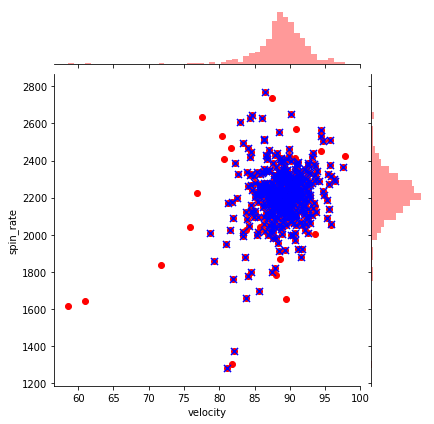

In [231]:
graph = sns.jointplot(x = df_knn["velocity"], y=df_knn["spin_rate"], color="r")
graph.x = df_no_out2["velocity"]
graph.y = df_no_out2["spin_rate"]
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)

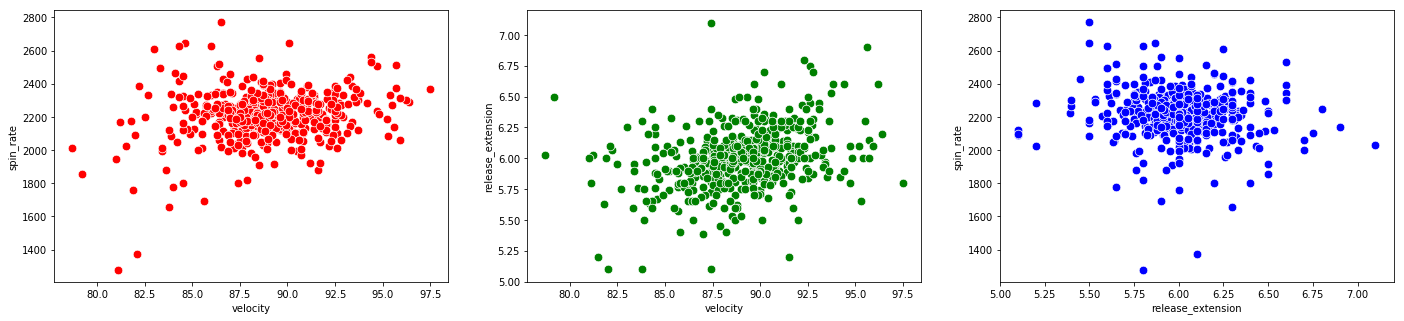

In [230]:
  
f, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(24,5))   

sns.scatterplot(x = "velocity", y = "spin_rate", data=df_no_out2, ax=axes[0], color="r", s=75)                                                
sns.scatterplot(x = "velocity", y = "release_extension", data=df_no_out2, ax=axes[1], color="g", s=75)                                           
sns.scatterplot(x = "release_extension", y = "spin_rate", data=df_no_out2, ax=axes[2],  color="b", s=75)

plt.close(2)
plt.close(3)
plt.close(4)
plt.show()

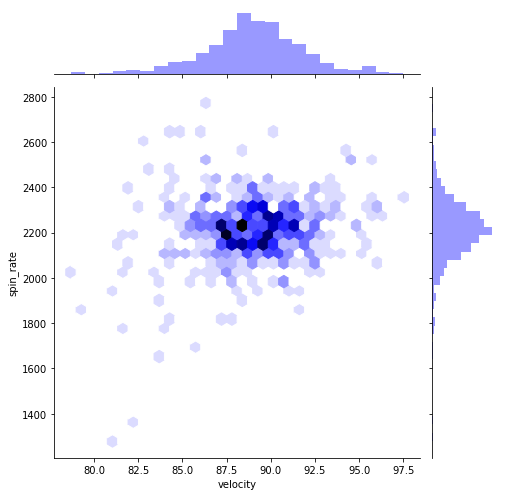

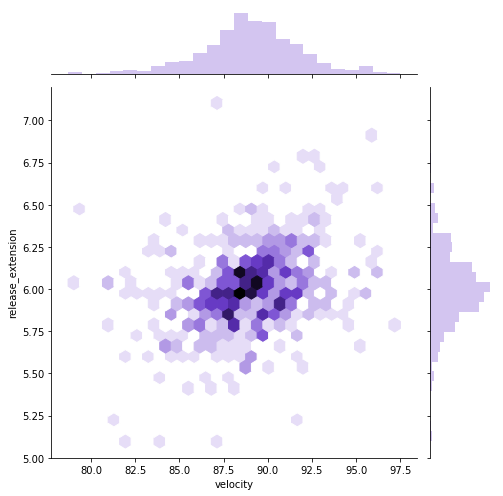

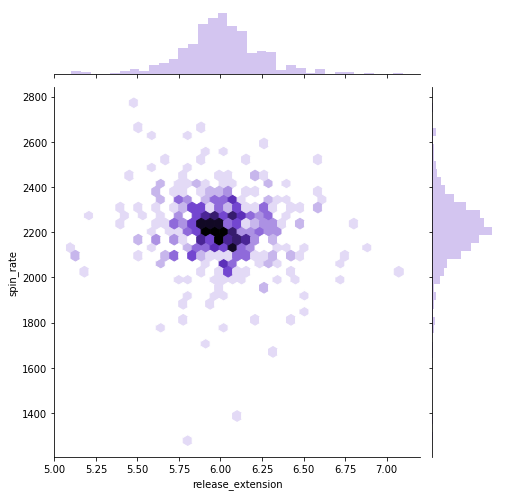

In [229]:
sns.jointplot(x = "velocity", y = "spin_rate", data=df_no_out2, kind="hex",  color="b", height=7)
plt.show()
sns.jointplot(x = "velocity", y = "release_extension", data=df_no_out2, kind="hex", color="mediumpurple", height=7)
plt.show()
sns.jointplot(x = "release_extension", y = "spin_rate", data=df_no_out2, kind="hex", color="mediumpurple", height=7)
plt.show()

Remember correcting outliers is an option too

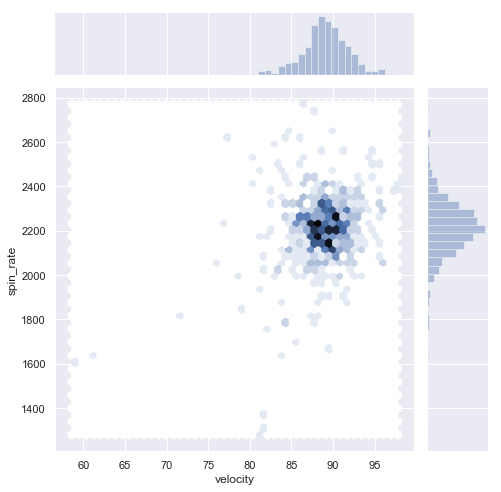

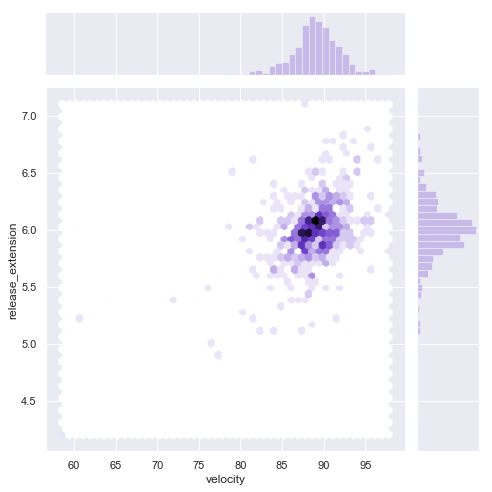

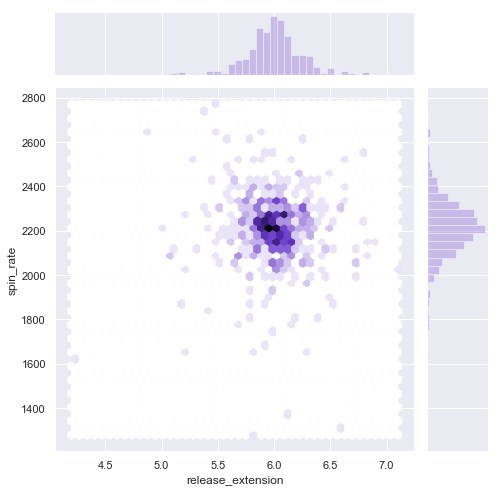

In [349]:
sns.jointplot(x = "velocity", y = "spin_rate", data=df_knn, kind="hex", color="b", height=7)
plt.show()
sns.jointplot(x = "velocity", y = "release_extension", data=df_knn, kind="hex", color="mediumpurple", height=7)
plt.show()
sns.jointplot(x = "release_extension", y = "spin_rate", data=df_knn, kind="hex", color="mediumpurple", height=7)
plt.show()

### Every dataframe should have observations as the rows and variables as the columns.
This is one of the most imperative rules regarding cleaning data. If the DataFrame is not in this format, one 
### WHAT CAN ONE DO? 
We see that each observation (in this case player) is represented by a row, while the statistics and data about their home runs are represented by the columns. This means 


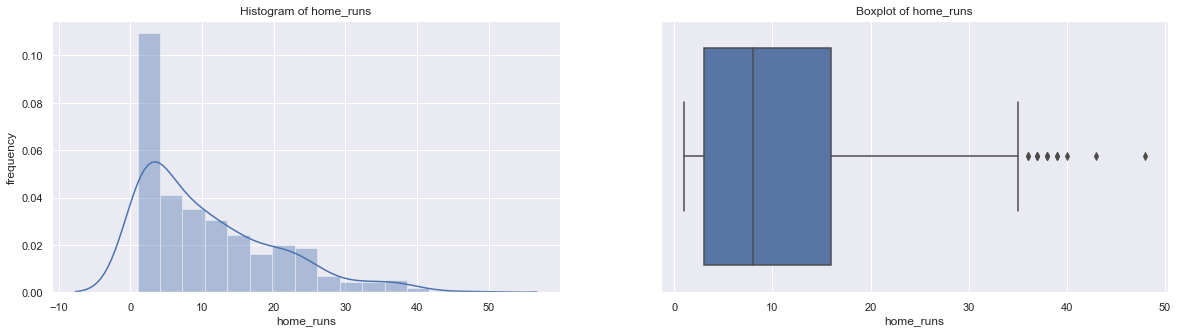


count    511.000000
mean      10.872798
std        9.505286
min        1.000000
25%        3.000000
50%        8.000000
75%       16.000000
max       48.000000
Name: home_runs, dtype: float64


player_name is not a numerical variable




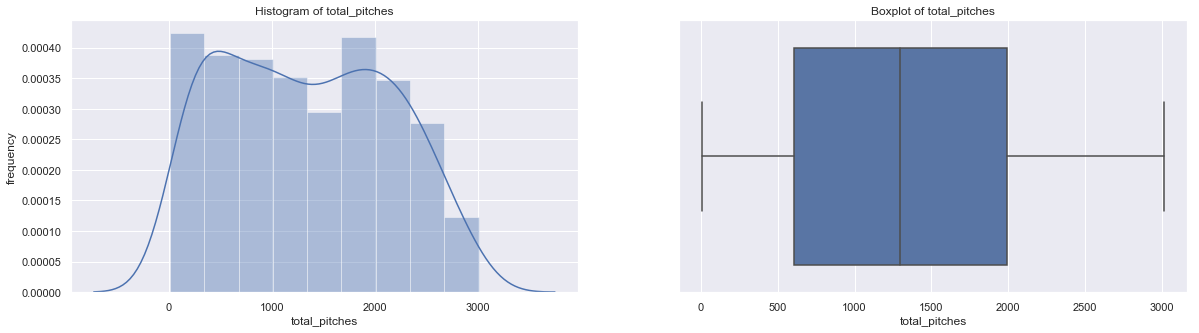


count     511.000000
mean     1335.929550
std       809.207256
min        12.000000
25%       603.500000
50%      1294.000000
75%      1988.500000
max      3009.000000
Name: total_pitches, dtype: float64




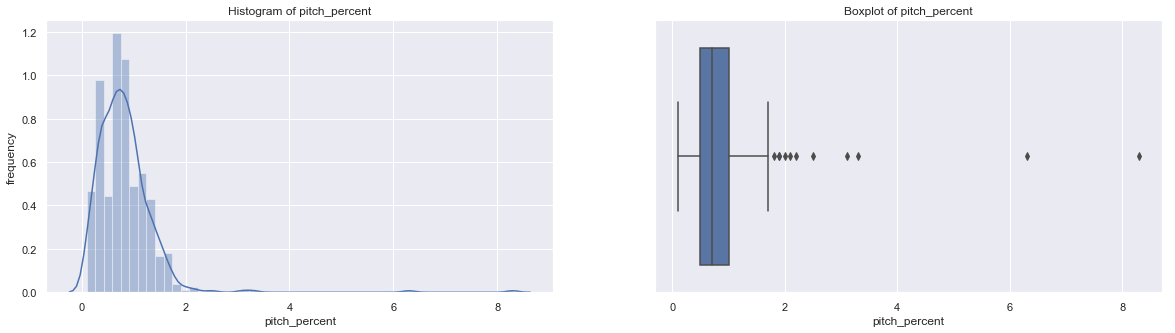


count    511.000000
mean       0.821135
std        0.598350
min        0.100000
25%        0.500000
50%        0.700000
75%        1.000000
max        8.300000
Name: pitch_percent, dtype: float64




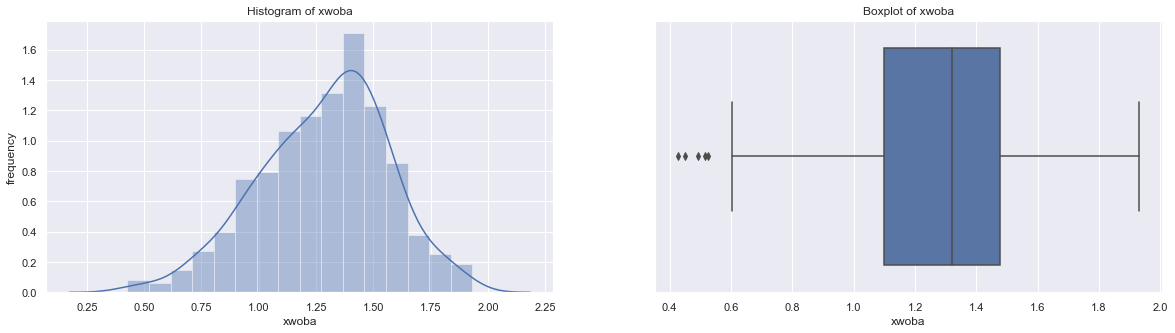


count    511.000000
mean       1.283994
std        0.278191
min        0.427000
25%        1.098000
50%        1.321000
75%        1.478500
max        1.931000
Name: xwoba, dtype: float64




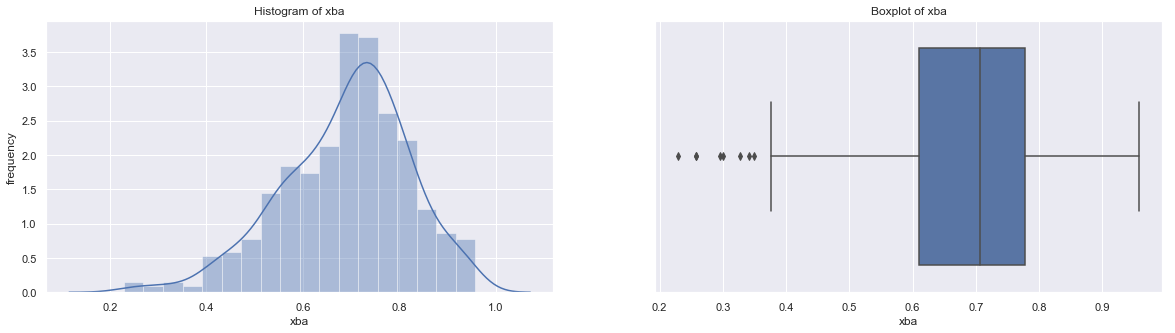


count    511.000000
mean       0.689691
std        0.131151
min        0.229000
25%        0.609500
50%        0.706000
75%        0.777500
max        0.958000
Name: xba, dtype: float64




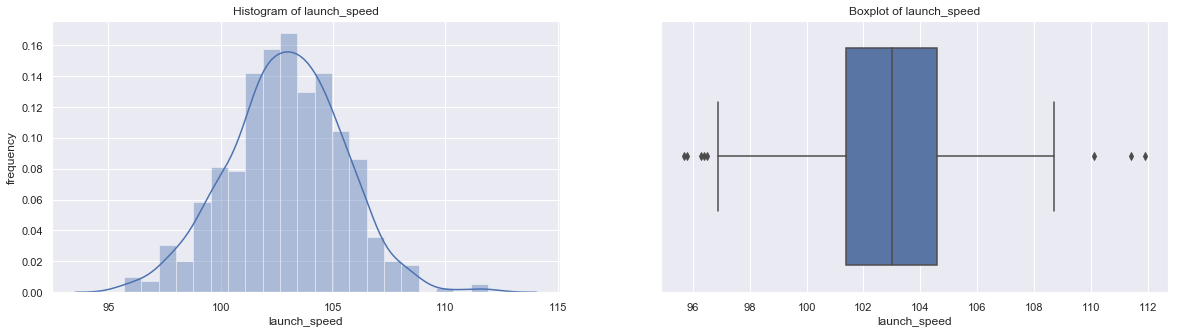


count    511.000000
mean     102.903523
std        2.518323
min       95.700000
25%      101.400000
50%      103.000000
75%      104.600000
max      111.900000
Name: launch_speed, dtype: float64




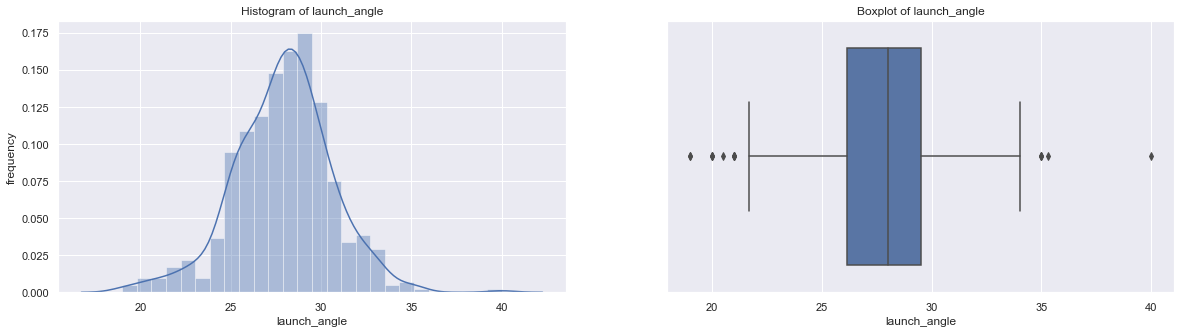


count    511.000000
mean      27.903718
std        2.703579
min       19.000000
25%       26.150000
50%       28.000000
75%       29.500000
max       40.000000
Name: launch_angle, dtype: float64




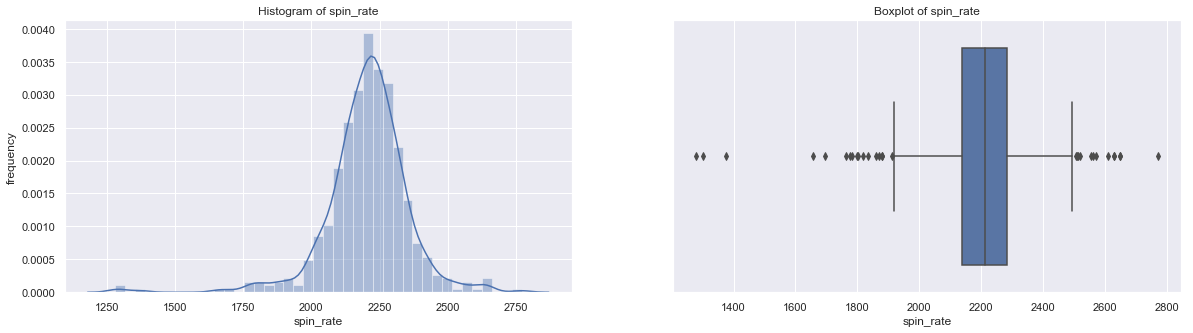


count     511.000000
mean     2204.914764
std       152.314952
min      1280.000000
25%      2137.500000
50%      2213.000000
75%      2284.500000
max      2770.000000
Name: spin_rate, dtype: float64




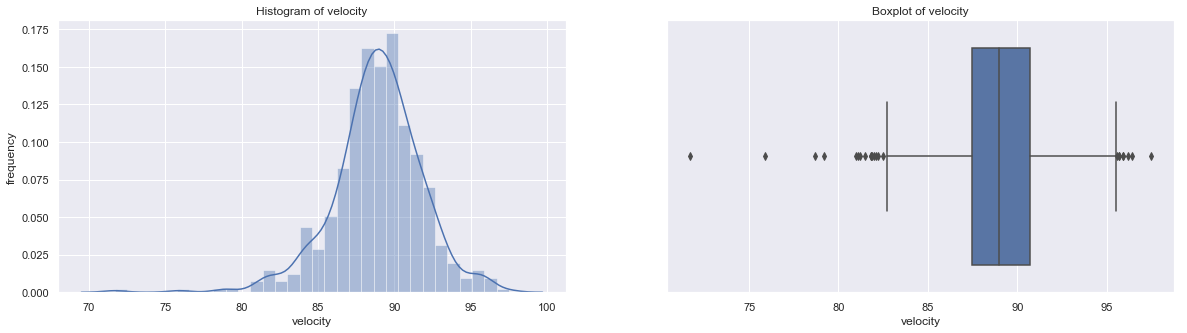


count    511.000000
mean      88.888063
std        2.941967
min       71.700000
25%       87.450000
50%       89.000000
75%       90.700000
max       97.500000
Name: velocity, dtype: float64




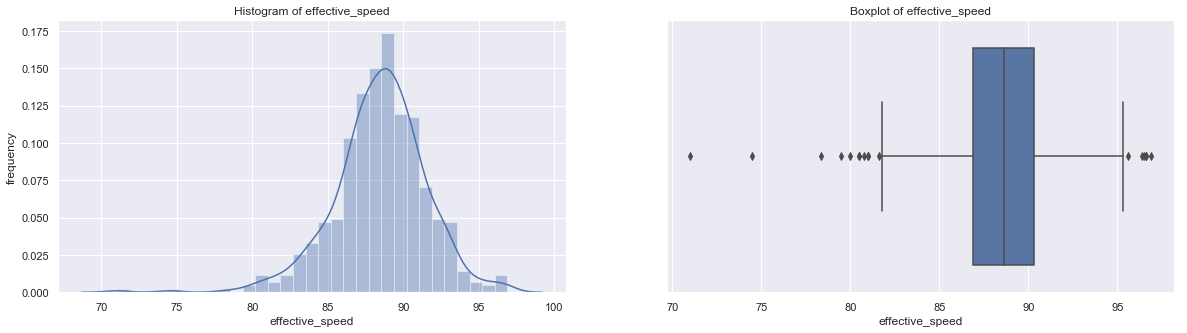


count    511.000000
mean      88.463542
std        3.061273
min       71.000000
25%       86.890000
50%       88.620000
75%       90.330000
max       96.900000
Name: effective_speed, dtype: float64




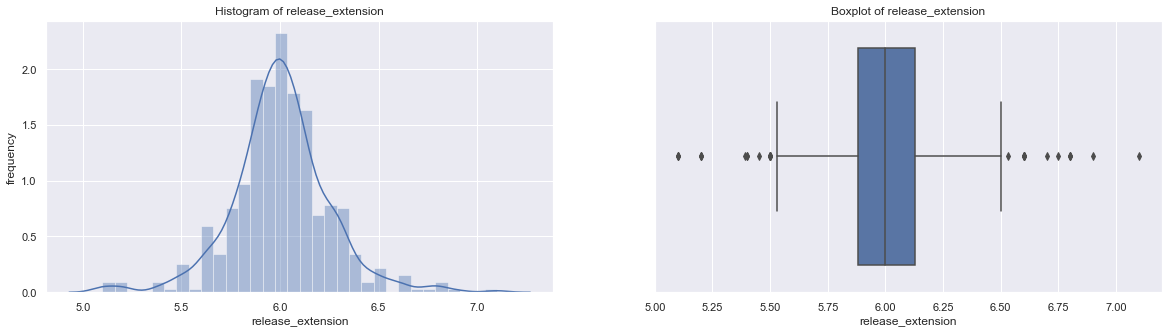


count    511.000000
mean       6.003855
std        0.249109
min        5.100000
25%        5.880000
50%        6.000000
75%        6.130000
max        7.100000
Name: release_extension, dtype: float64




In [356]:
#loop through columns of df_knn
for x in df_no_out1:
    if (df_no_out1[x].dtype == 'int64' or df_no_out1[x].dtype == 'float64') :      #only plots values that are integers or floats
        plt.figure(figsize=(20, 5))                                        #expand figure size to fit two plots comfortably
        plt.subplot(1,2,1)                                                 #creates two subplots in the plot, shaped with one row and two columns, and we're dealing with the first plot
        hist = sns.distplot(df_no_out1[x])                                     #create histogram
        hist.set_title("Histogram of " + str(x))                        
        hist.set_ylabel(str("frequency"))                           
         
        plt.subplot(1,2,2)                                                 #this is the second plot 
        sns.boxplot(x = df_no_out1[x], orient="h")                             #orient makes it horizontal
        plt.title("Boxplot of " + str(x))                               
        plt.show()                                                         #show the plot
            
        print("\n" + str(df_no_out1[x].describe()) + "\n\n")                   #newline, then print the summary statistics for that variable
        
    else: 
        print(str(x) +" is not a numerical variable\n\n")                 #print that the variable isn't an integer or float
        


***
### **Chapter 4   <a class="anchor" id="4.0"></a>**
### **Why the pandas DataFrame?**

### Keep your dataframe as a dataframe for as long as you can

This is the second cardinal rule for cleaning data with pandas. The Pandas DataFrame is one of the most convenient and versatile objects in your python toolbelt, and you shouldn't stray from it unless you have good reason to. To illustrate this, we'll take a look at the pitch_percent variable we noticed contained some outliers. You may be temped to simply take the values from the pitch_percent column and convert them to a list and sort them like so:

In [89]:
#create list of values for pitch percent and sort

pitch_per = df_knn["pitch_percent"]
listpitch_per = list(pitch_per)
listpitch_per.sort()
print(listpitch_per)

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6,

We see those last two values are much higher than the others. Does that make them invalid? We have no idea.

### The status of a data point as an outlier is strongly reliant upon its context.

Was the player who hit at such a high percentage a pitcher or other player who gets very few at bats? How many home runs did they account for as a proportion of the total home runs in 2018? 

If you want to pair the name of the player with pitch_percent, you may think to use a dictionary. However, as the following code demonstrates, you lose the ability to sort the data when you do this and have to twist its arm to get it to work:

In [90]:
# create dictionary for pitch_percent
pitch_percent = dict(zip(df_knn.player_name,df_knn.pitch_percent))

# sort and print the dictionary using lambda function
sorted_pitch_percent = sorted(pitch_percent.items(), key=lambda x: x[1], reverse=True)
print(sorted_pitch_percent)

[('A.J. Cole', 8.3), ('Ryder Jones', 6.3), ('Brandon Woodruff', 3.3), ('Michael Lorenzen', 3.1), ('Ryan Schimpf', 2.9), ('Myles Straw', 2.5), ('Luke Voit', 2.2), ('Nolan Fontana', 2.1), ('Trevor Plouffe', 2.0), ('Khris Davis', 1.9), ('Lane Adams', 1.9), ('Matt Skole', 1.9), ("Travis d'Arnaud", 1.8), ('J.D. Martinez', 1.7), ('Joey Gallo', 1.7), ('Max Muncy', 1.7), ('Matt Adams', 1.7), ("Ryan O'Hearn", 1.7), ('Franklin Barreto', 1.7), ('Patrick Wisdom', 1.7), ('Ildemaro Vargas', 1.7), ('Nelson Cruz', 1.6), ('David Dahl', 1.6), ("Tyler O'Neill", 1.6), ('Francisco Arcia', 1.6), ('DJ Stewart', 1.6), ('Reese McGuire', 1.6), ('Adam Rosales', 1.6), ('Mike Trout', 1.5), ('Nolan Arenado', 1.5), ('Manny Machado', 1.5), ('Javier Baez', 1.5), ('Daniel Palka', 1.5), ('Hunter Renfroe', 1.5), ('Evan Gattis', 1.5), ('Shohei Ohtani', 1.5), ('Tyler Austin', 1.5), ('Yoenis Cespedes', 1.5), ('Pedro Alvarez', 1.5), ('Aramis Garcia', 1.5), ('Rowdy Tellez', 1.5), ('John Gant', 1.5), ('Trevor Story', 1.4), ('C

There you have it! You can now see that A.J Cole and Ryder Jones are the two who represent the outliers for pitch_percent. A quick google search reveals that the two outlier players had a total of 11 at bats between them. However, your data is now in a list of tuples, a datatype which is immutable, and this method was unnecessarily complicated. We'll show next how much easier and more versatile these operations are with the pandas DataFrames.

***
### Some pandas DataFrame Operations  <a class="anchor" id="4.1"></a>

Back to the outlier example for pitch_percentage: What exactly is pitch percent? Is it percentage of balls hit for home runs opposed to total pitches seen? Or is it something else?

### Always properly label your data
One thing I cannot thank the folks over at Savant for is the lack of labeling for many of their statistics. Almost none of them have units, and many of the statistics are not explained at all in their reference guide. Thankfully, this gives us a chance to practice a few useful methods on pandas Dataframes!

First, we subset the DataFrame to just a few select variables. To do this, one can use the loc or iloc DataFrame methods.

In [91]:
# subset df_2 to just include columns we want

pitch_percent_df = df_knn.loc[:, ["player_name", "home_runs", "total_pitches", "pitch_percent"]]
pitch_percent_df.head(n = 10)

,player_name,home_runs,total_pitches,pitch_percent
0,Khris Davis,48,2514,1.9
1,J.D. Martinez,43,2519,1.7
2,Joey Gallo,40,2348,1.7
3,Jose Ramirez,39,3002,1.3
4,Mike Trout,39,2543,1.5
5,Nolan Arenado,38,2592,1.5
6,Francisco Lindor,38,2920,1.3
7,Giancarlo Stanton,38,2942,1.3
8,Manny Machado,37,2529,1.5
9,Nelson Cruz,37,2282,1.6


Next, we calculate what we suspect the pitch percent to be, which is:        \begin{equation*} \frac{pitches}{total pitches}* 100 \end{equation*}

Don't forget that home runs are currently labeled as pitches! We'll fix that a bit later.

In [92]:
#calculate pitch percent by dividing home runs by total pitches and multiplying by 100 

percentage = round( (pitch_percent_df["home_runs"]) / (pitch_percent_df["total_pitches"]) * 100, 1)

And with the beauty of DataFrames, we can easily append our calculated percentage to the end of the current dataframe by assigning the new series (a one-dimensional labeled array) to the current DataFrame with a new column name, 'percent':

In [93]:
pitch_percent_df["percent"] = percentage
pitch_percent_df.head(n = 20)

,player_name,home_runs,total_pitches,pitch_percent,percent
0,Khris Davis,48,2514,1.9,1.9
1,J.D. Martinez,43,2519,1.7,1.7
2,Joey Gallo,40,2348,1.7,1.7
3,Jose Ramirez,39,3002,1.3,1.3
4,Mike Trout,39,2543,1.5,1.5
5,Nolan Arenado,38,2592,1.5,1.5
6,Francisco Lindor,38,2920,1.3,1.3
7,Giancarlo Stanton,38,2942,1.3,1.3
8,Manny Machado,37,2529,1.5,1.5
9,Nelson Cruz,37,2282,1.6,1.6


Thankfully we see our percent column is equal to the pitch_percent column we were testing for outliers and our equation was correct! But what if we want to check analytically? Since we have them conveniently sitting in our dataframe, we can convert them to lists using the **tolist()** method and compare them in one quick line?

In [94]:
# compare two columns in pitch_percent_df as lists
pitch_percent_df["pitch_percent"].tolist() == pitch_percent_df["percent"].tolist()

False

What? False? But that doesn't seem right! We can use a list comprehension to compare the lists and see exactly what isn't equal. We could do this in one line, but it's always worth remembering that readability is crucial. If no one can read your code, it might as well be in another language!

In [95]:
# convert columns to lists
list1 = pitch_percent_df["pitch_percent"].tolist()
list2 = pitch_percent_df["percent"].tolist()

In [96]:
# list comprehension compares values from each list and returns the unequal values as well as the player they correspond to
[print("The values that are not equal are " + str(i) + " and " + str(j) + "! This corresponds to the player "  +  str(df_knn.loc[df_knn["pitch_percent"] == i, 'player_name'].item()) + "!" ) for i, j in zip(list1 , list2) if i != j]

The values that are not equal are 6.3 and 6.2! This corresponds to the player Ryder Jones!


[None]

Our old friend Ryder Jones strikes again! His single home run and lack of at bats caused a rounding error at Statcast! 

In [97]:
launch_angle_df = df_knn.loc[:, ["player_name", "launch_angle"]]
print(launch_angle_df.sort_values(by = ["launch_angle"], ascending = False).head(n=15))


           player_name  launch_angle
482         J.D. Davis          40.0
458       Nick Martini          40.0
448        Chase Utley          39.0
515      Alex Blandino          38.0
467     Brandon Barnes          38.0
386        Jeff McNeil          35.3
453       Jake Arrieta          35.0
500  Anthony Santander          35.0
461   Christian Arroyo          35.0
434     Brett Phillips          34.0
475    Clayton Richard          34.0
307          Tony Kemp          34.0
166        Jose Altuve          33.5
424        Pat Valaika          33.5
171  Curtis Granderson          33.2


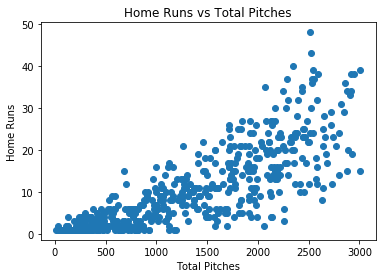

In [101]:
plt.scatter(df_knn["total_pitches"], df_knn["home_runs"])
plt.xlabel("Total Pitches")
plt.ylabel("Home Runs")
plt.title("Home Runs vs Total Pitches")
plt.show()

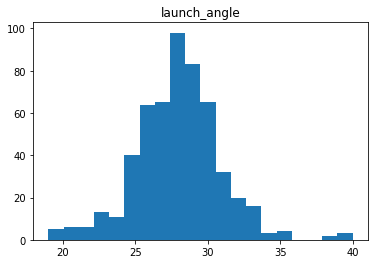

In [102]:
# increase bins to see not actually an outlier

plt.hist(df_knn["launch_angle"], bins = 20)
plt.title(str("launch_angle"))
plt.show()

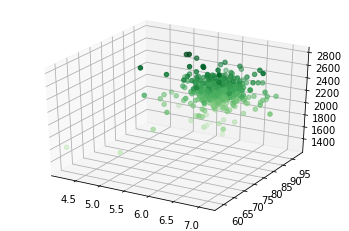

In [103]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
zdata = df_knn["spin_rate"]
xdata = df_knn["release_extension"]
ydata = df_knn["velocity"]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
plt.show()

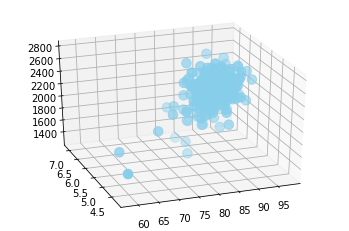

In [104]:
fig =  plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(df_knn["velocity"], df_knn["release_extension"], df_knn["spin_rate"], c="skyblue", s = 90)
ax.view_init(30,250)
plt.show()

plot velocity vs percieved

A special thank you to Daren Willman for making the Statcast data available on Savant. Here's a link to his [twitter account](https://twitter.com/darenw), where he regularly shares amazing new visualization methods and tools. [This](https://baseballsavant.mlb.com/visuals/homers) is my personal favorite.

[pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)

[Matplotlib documentation](https://matplotlib.org/Matplotlib.pdf)